## Analysis of algorithms that make exact recovery of the cluster structure in GBM
Model description is [here](https://arxiv.org/pdf/1709.05510.pdf)

Candidate algorithms are: 
1. Motif-counting algorithm (from the above paper) and its modification from [here](https://arxiv.org/abs/1804.05013)
2. Spectral clustering with a smart choice of the optimal eigenvectors (k-means around optimal value)
3. Expansion algorithm described in my draft [here](https://www.overleaf.com/project/5e9483ae085e6600014af805)

Last update: 21/05/2020

### This notebook uses the classes.py file where principal classes and functions are defined

File classes.py is on autoreload

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt
import seaborn as sns
from classes_dense_GBM import GBM_graph, Motif_Counting, Motif_Counting_second_paper, Expansion_algorithm, simulation, full_simulation, k_means_analysis
import tqdm
import time 
import warnings
import copy
import scipy
warnings.filterwarnings("ignore")
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [12]:
def eig_val(n, a, b, k):
    b_n = int(np.floor(b * np.log(n)))
    b_n_12 = int(np.floor((b * np.log(n) + 1) / 2))
    a_n_12 = int(np.floor(a * np.log(n) / 2))
                      
    T1 = 0
    for i in range(1, b_n + 1):
        T1 += np.cos(2 * np.pi * k * i / n)
        
    T2 = 0
    for i in range(b_n_12, a_n_12 + 1):
        T2 += np.cos(4 * np.pi * k * i / n)

    return 1 - 2 * (T1 + T2)/(a * np.log(n) + b * np.log(n))

def error(G):
    n = G.number_of_nodes()
    L = nx.normalized_laplacian_matrix(G)
    I = scipy.sparse.identity(n)
    
#     optimal_val = eig_val(n, G.a, G.b, int(n/2))
    optimal_val = 2 * G.b / (G.a + G.b)
    optimal_vec = [1 for i in range(int(n/2))] + [-1 for i in range(int(n/2))]
    
    LI = L - optimal_val * I
    error_vec = LI.dot(optimal_vec)
    print(error_vec.shape)
    print(type(error_vec))
    
    return np.linalg.norm(error_vec)

In [170]:
eig_val(n, 10, 5, int(n/2))

0.6525786863267395

In [171]:
eig_val(n, 10, 5, 46)

0.6524319139956761

In [7]:
n = 10000
a = 10
b = 5

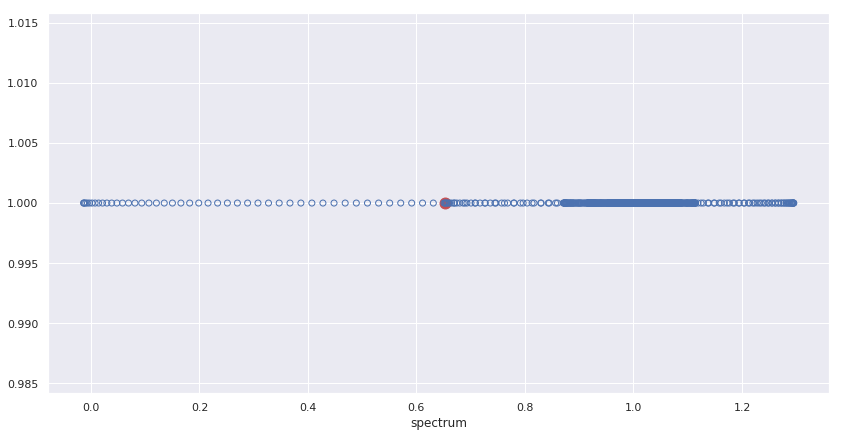

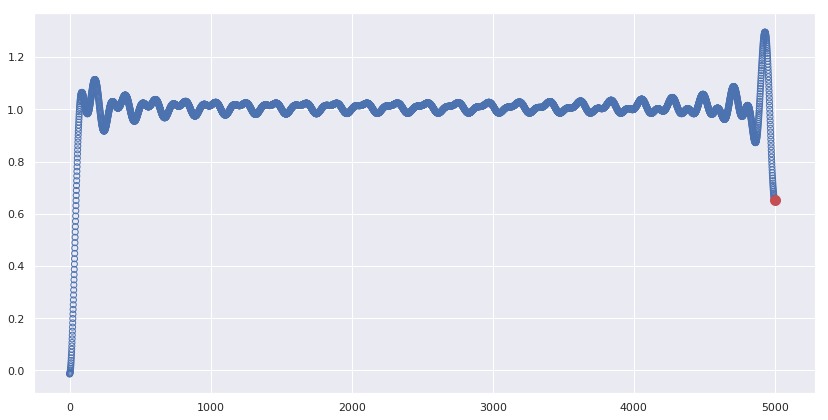

In [11]:
eig_vals = [eig_val(n, a, b, k) for k in range(int(n/2))]
good_value = [eig_val(n, a, b, int(n/2))]
optimal_val = 2 * b / (a + b)
plt.scatter(good_value, [1], marker='o', facecolors='r', edgecolors='r', s=120)
plt.scatter(eig_vals, [1 for i in range(len(eig_vals))], marker='o', facecolors='none', edgecolors='b')
# plt.axvline(x = optimal_val, linewidth = 2, color='black')
plt.xlabel(r"spectrum")
plt.savefig('mean-field-spectrum-n10000')
plt.show()

plt.scatter([i for i in range(len(eig_vals))], eig_vals, marker='o', facecolors='none', edgecolors='b')
plt.scatter([5000], good_value, marker='o', facecolors='r', edgecolors='r', s=100)
plt.show()

In [3]:
G = GBM_graph(n_1 = 1000, n_2 = 1000, a = 0.1, b = 0.05, disp = False)

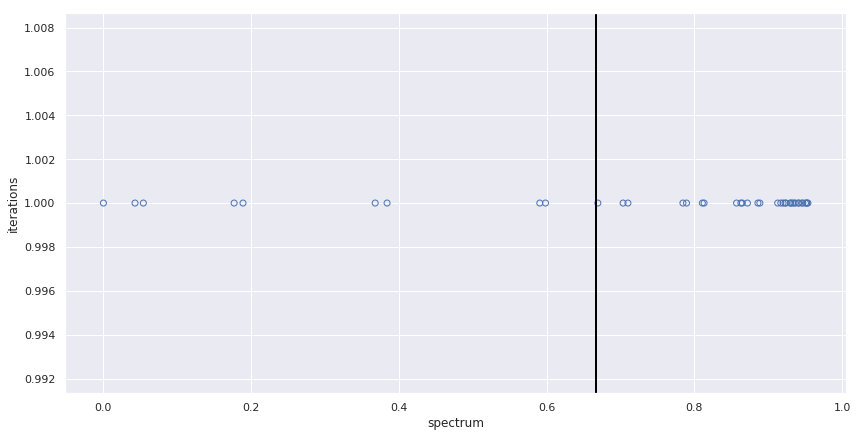

In [4]:
k_means_analysis(G, spectrum_disp=True)

In [13]:
error(G)

(2000,)
<class 'numpy.ndarray'>


2.1628109141214313

In [ ]:
mean_field_graph 

In [2]:
G = GBM_graph(n_1 = 500, n_2 = 500, a = 30, b = 7, disp = False)

In [3]:
m = Motif_Counting(G)

In [4]:
m.accuracy

1.0

In [5]:
fs = full_simulation([Motif_Counting, Motif_Counting_second_paper, Expansion_algorithm, Spectral_k_means],
                    n_1 = 500, 
                    n_2 = 500,
                    a_start = 20,
                    a_finish = 31,
                    a_step = 1,
                    b = 7,
                    n_trials = 10)

KeyboardInterrupt: 

In [43]:
G = GBM_graph(n_1 = 8000, n_2 = 8000, a = 15, b = 5)
n = G.number_of_nodes()
labeled_set = random.sample(list(G.nodes), int(0.02 * n))

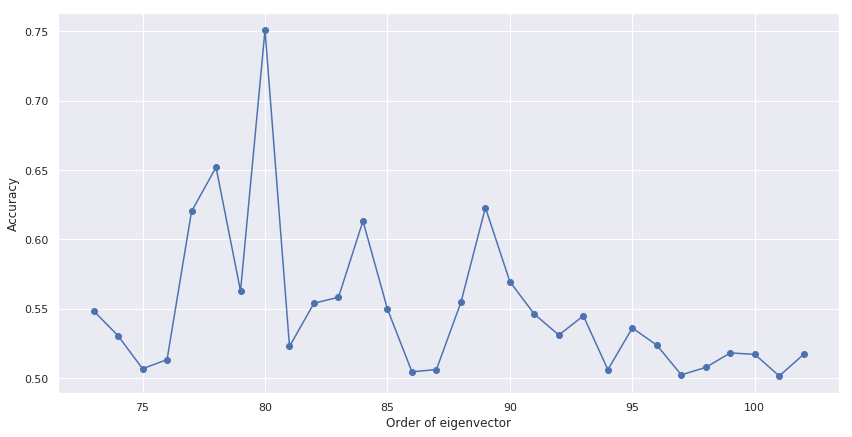

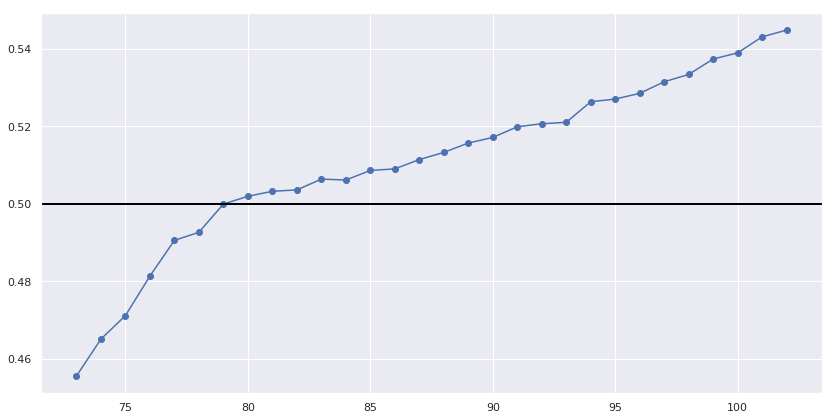

In [44]:
k_means_analysis(G, vectors = [], vectors_disp = True, sigma = 0.5)

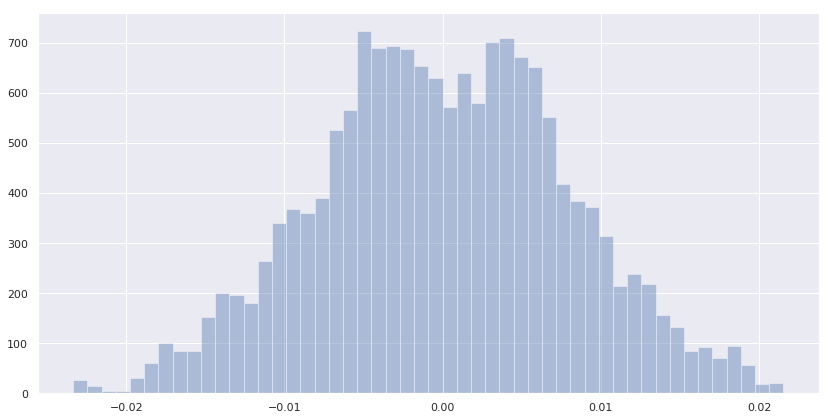

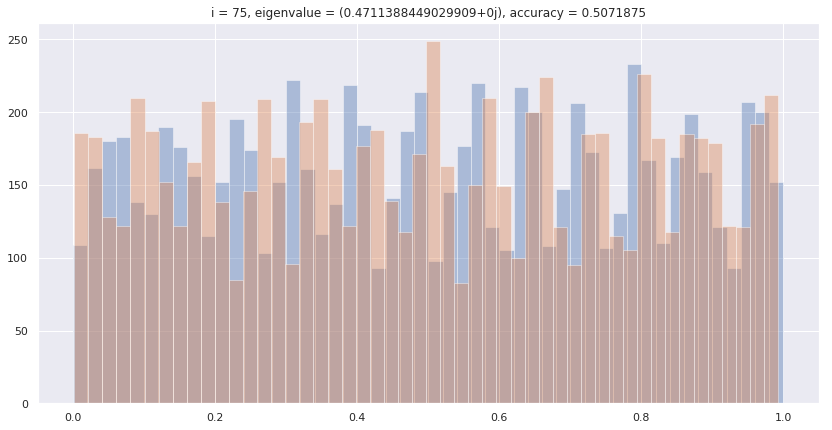

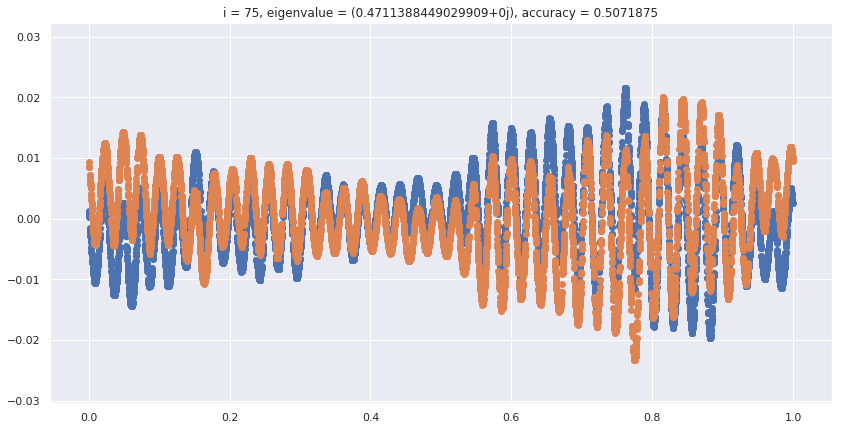

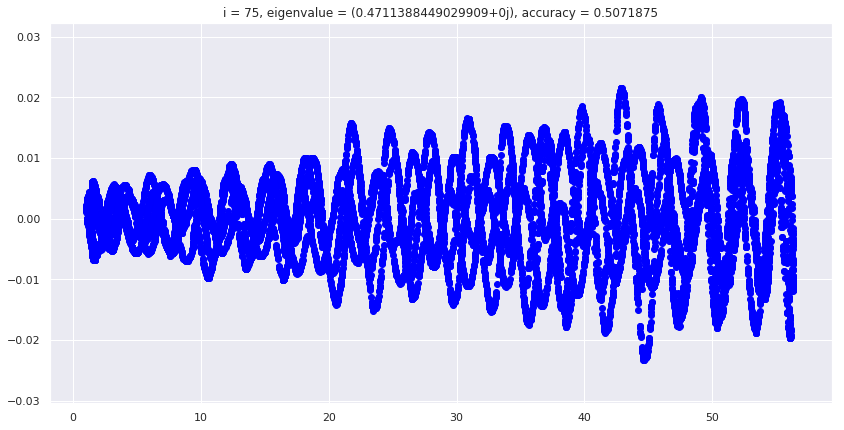

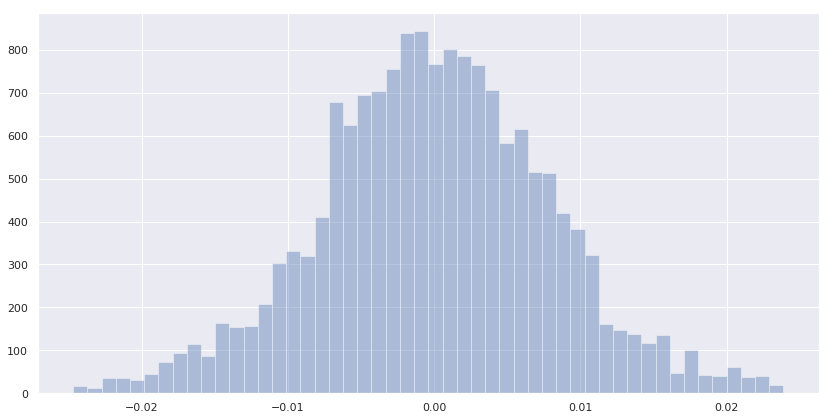

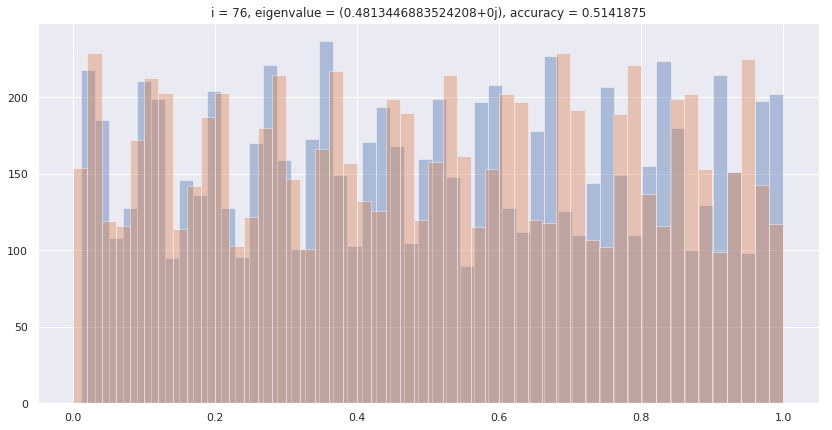

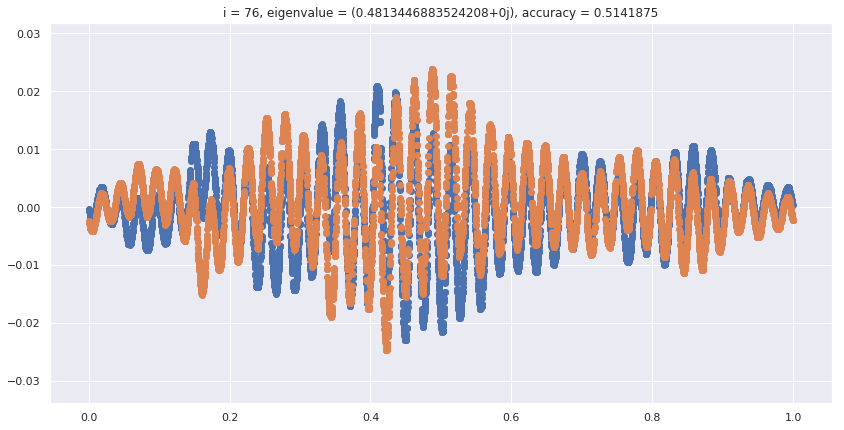

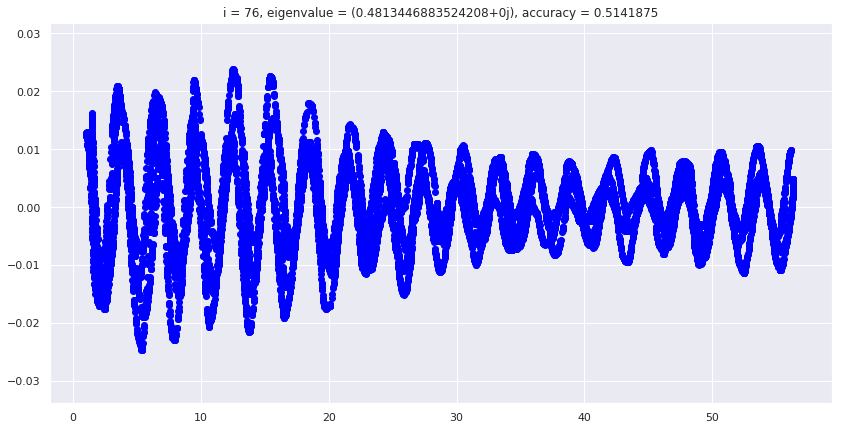

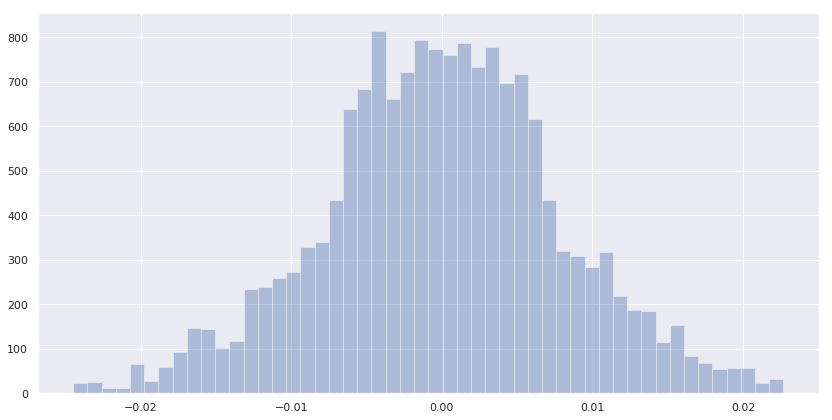

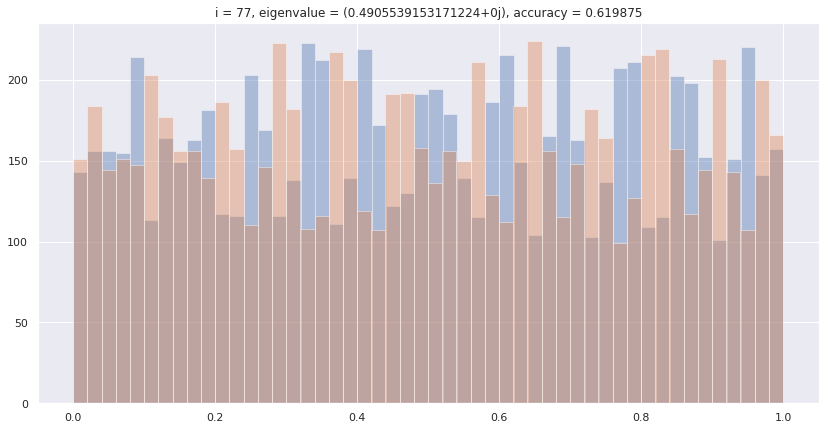

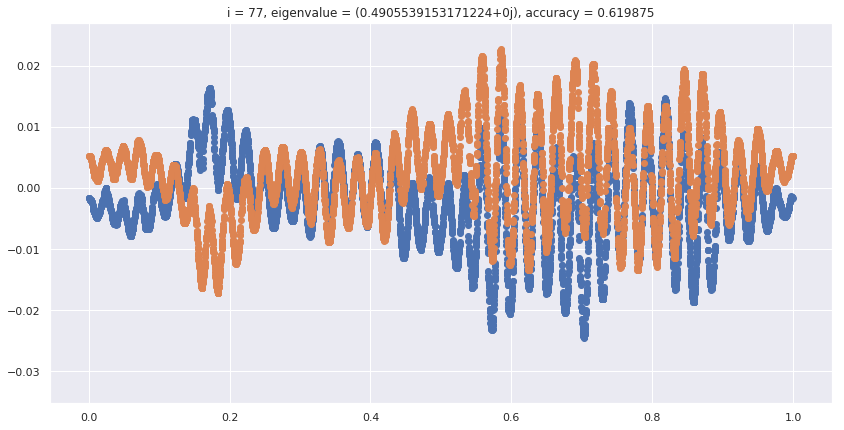

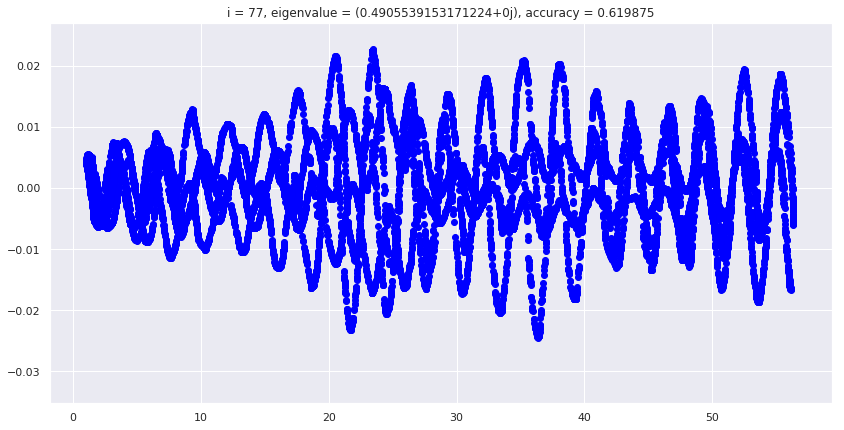

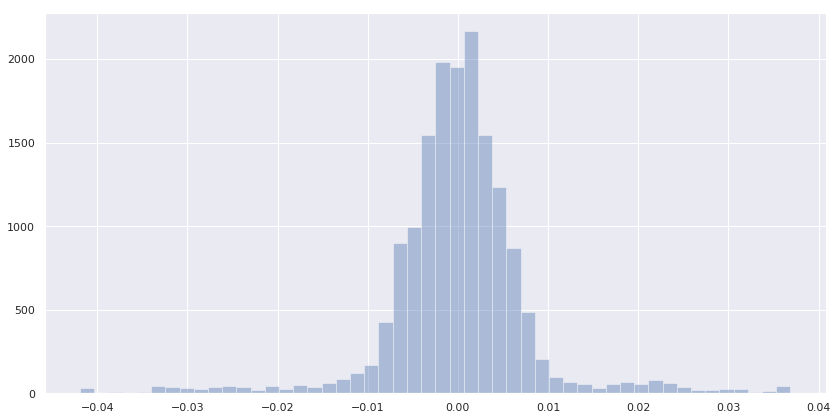

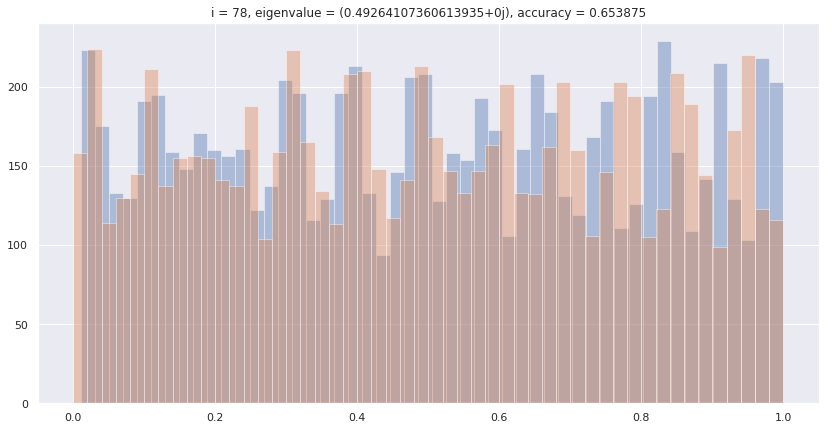

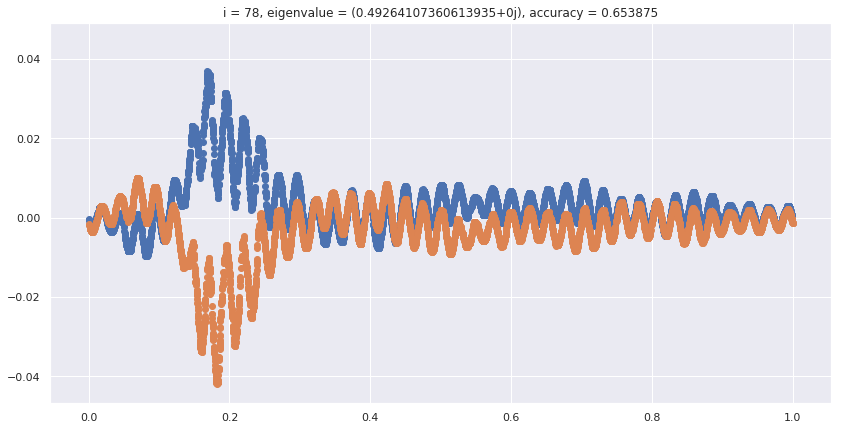

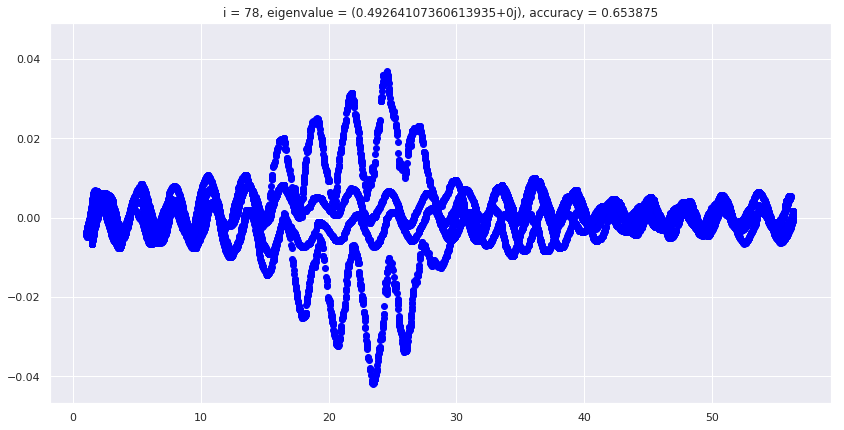

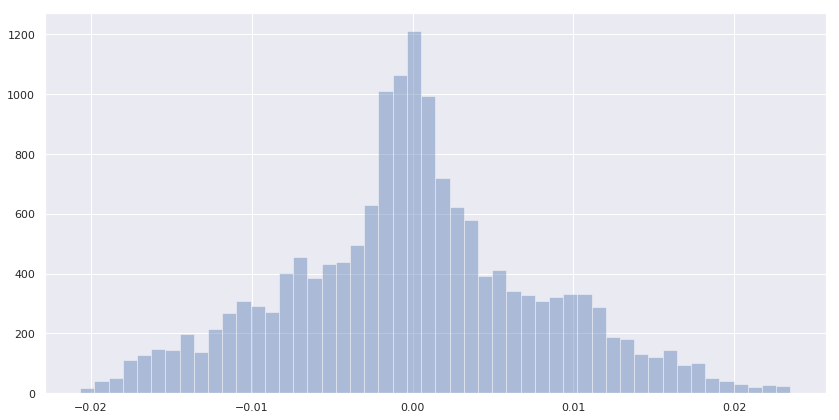

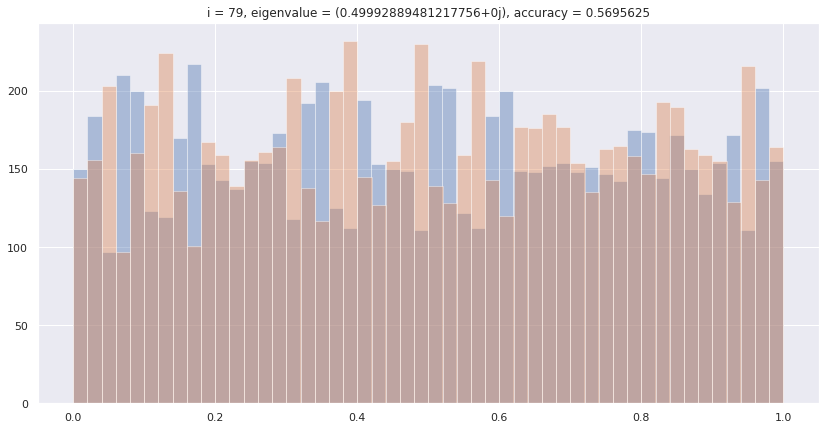

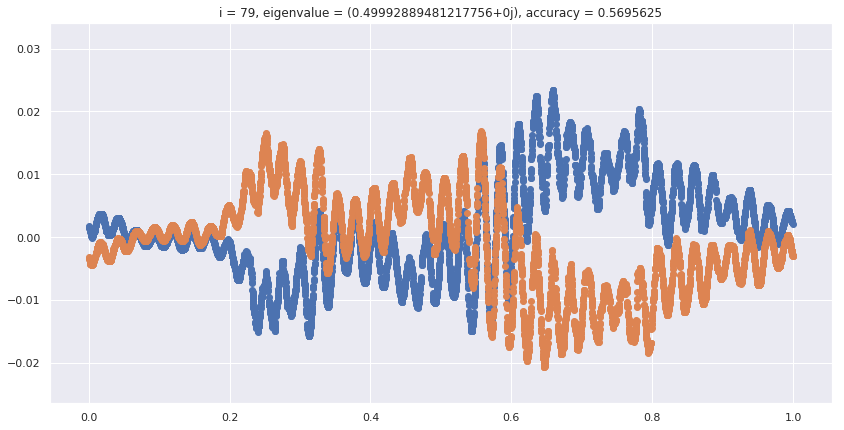

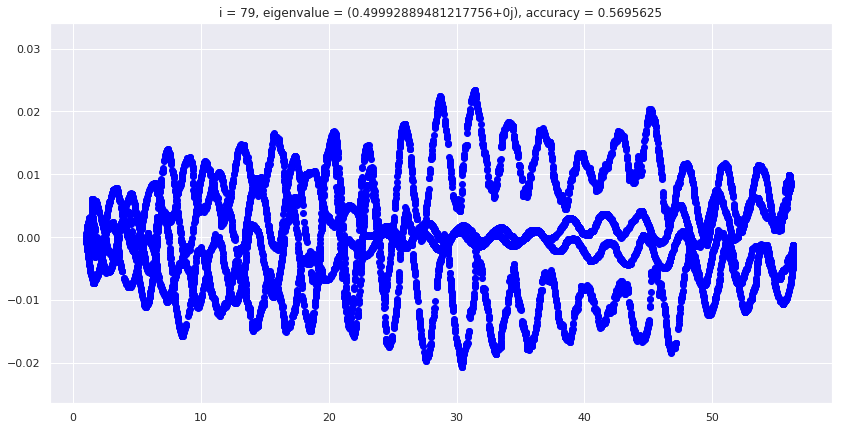

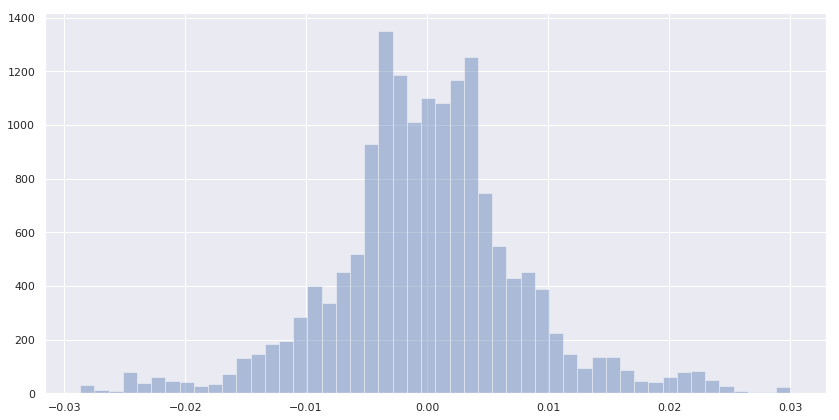

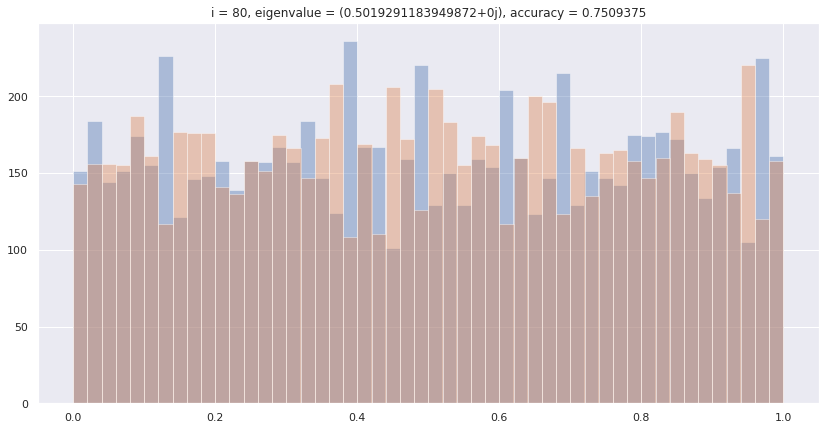

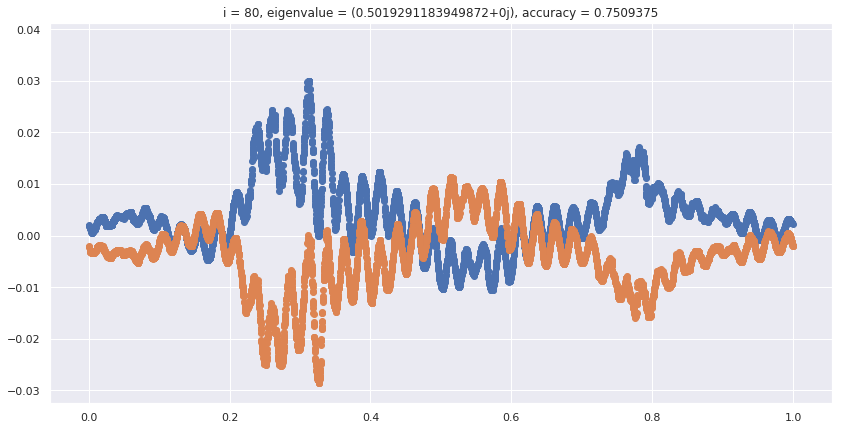

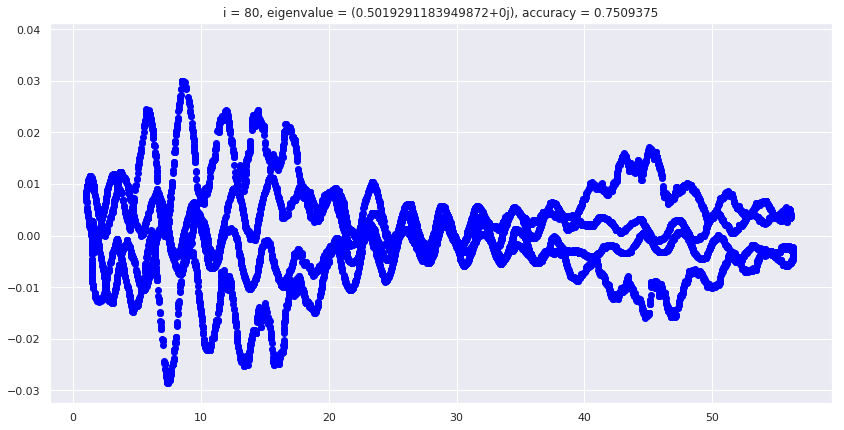

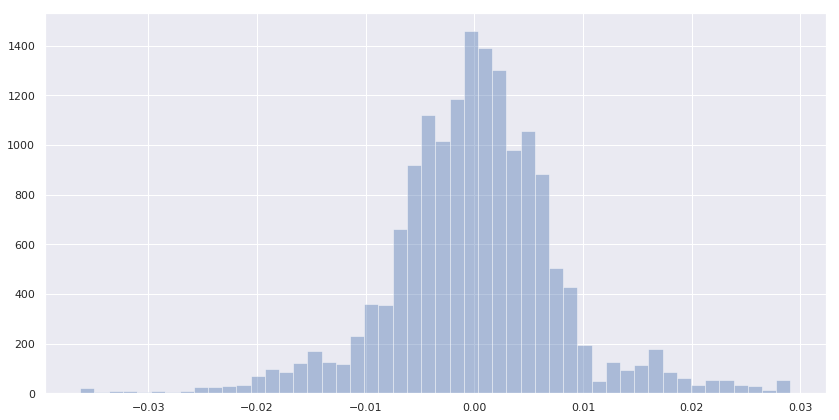

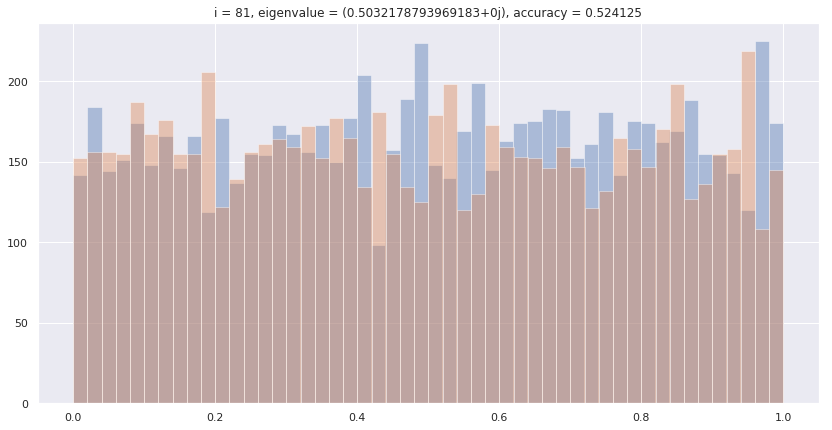

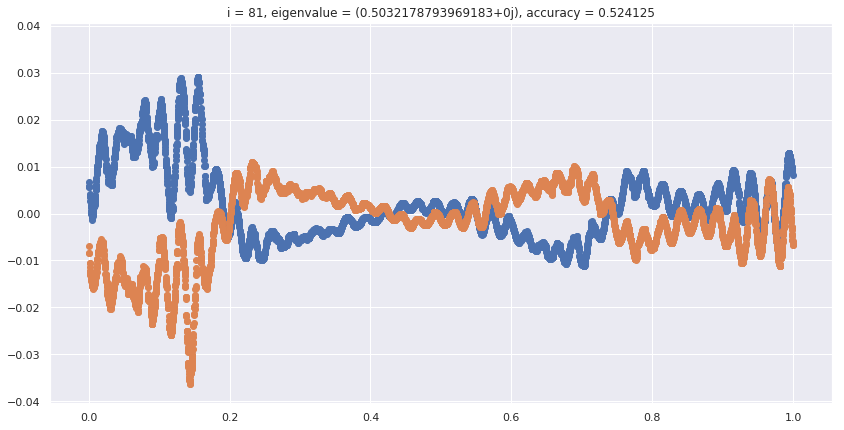

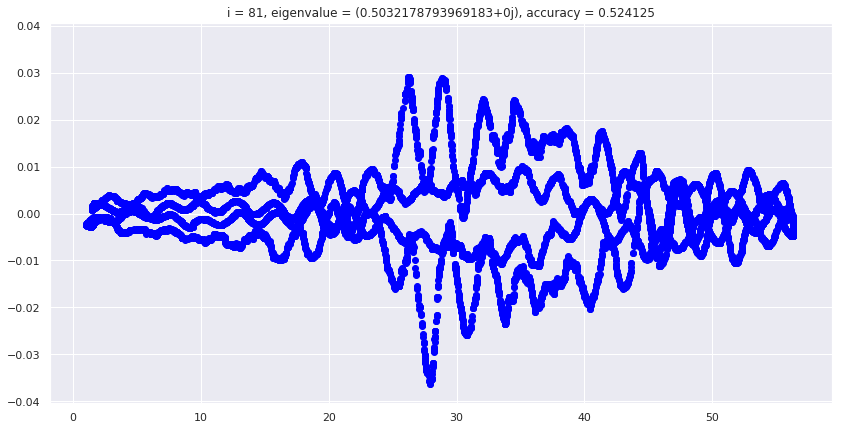

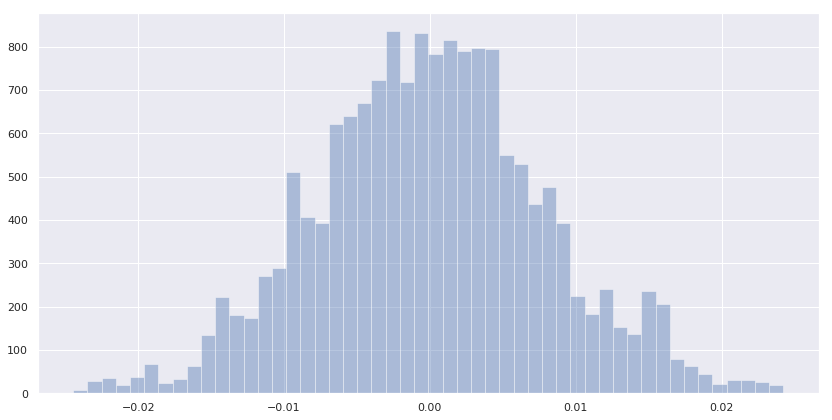

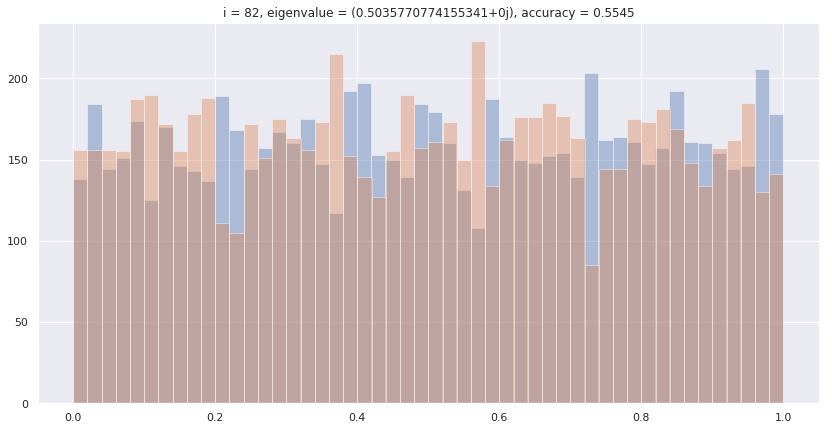

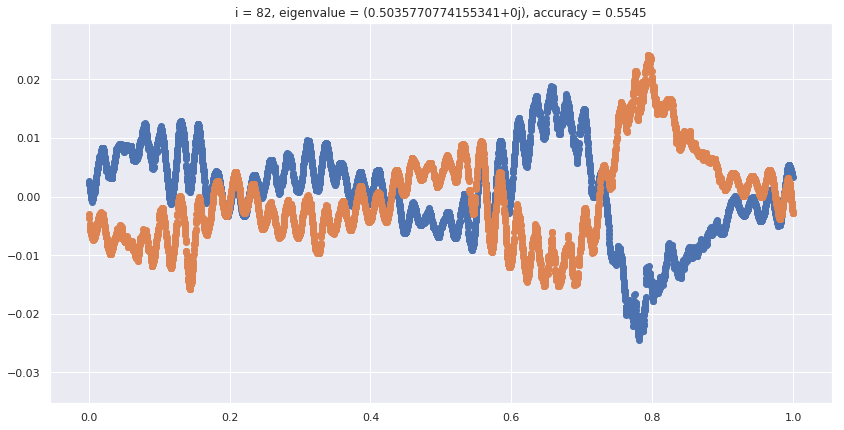

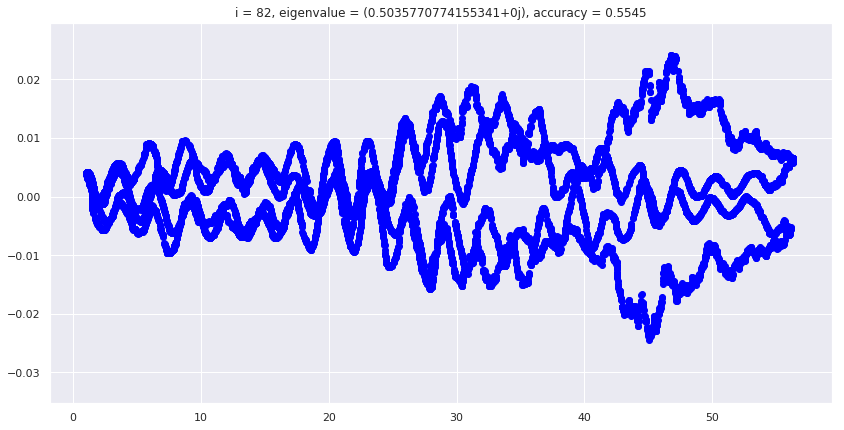

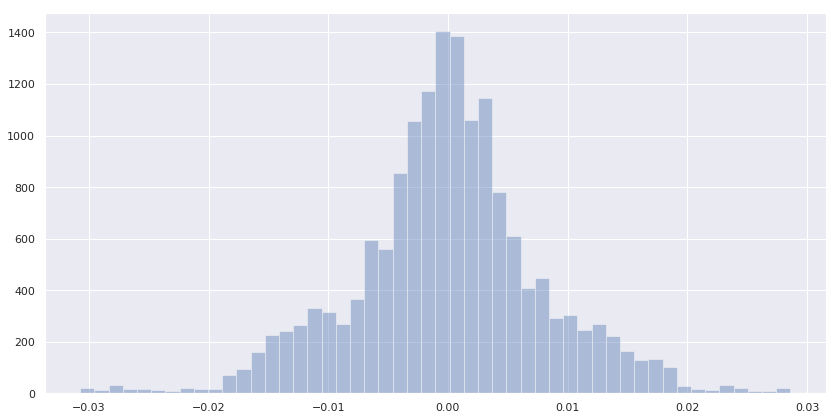

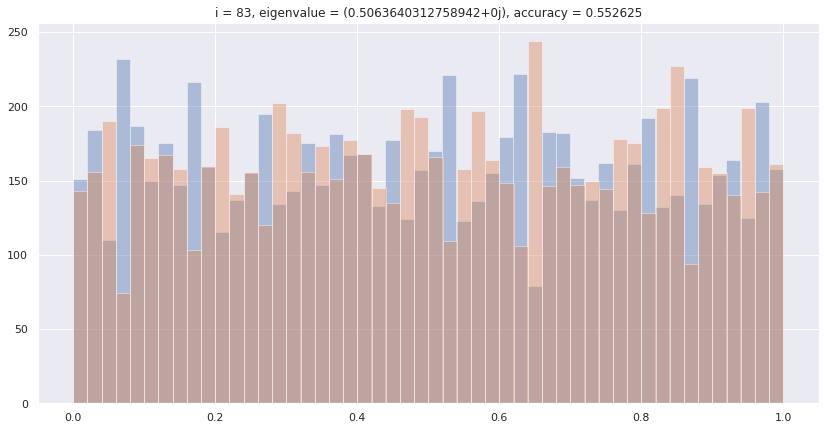

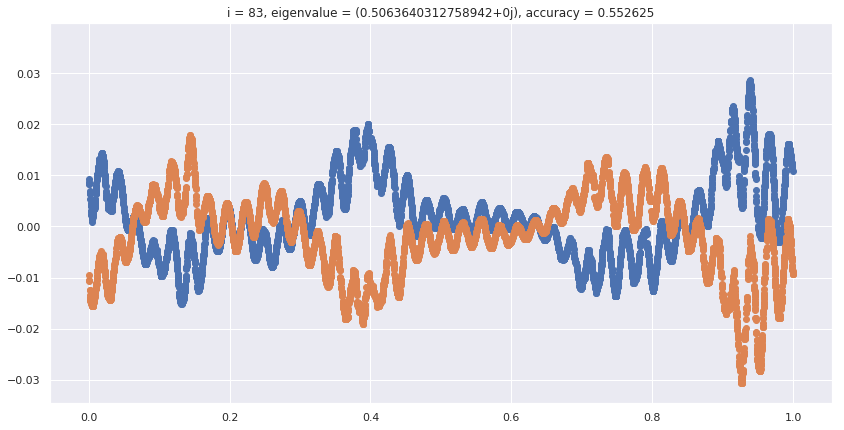

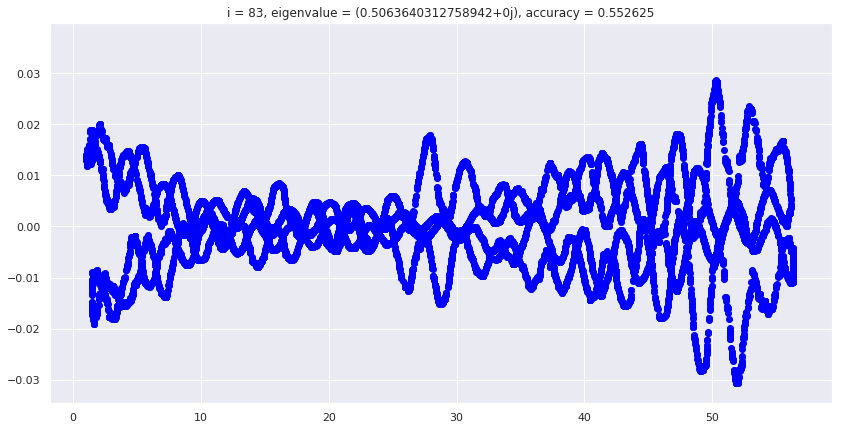

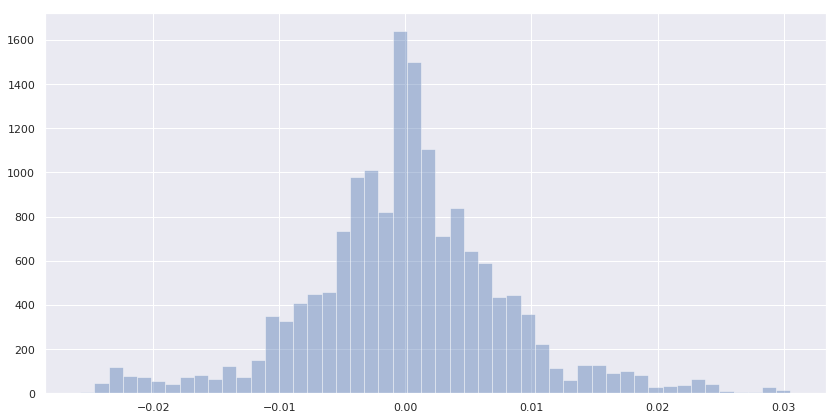

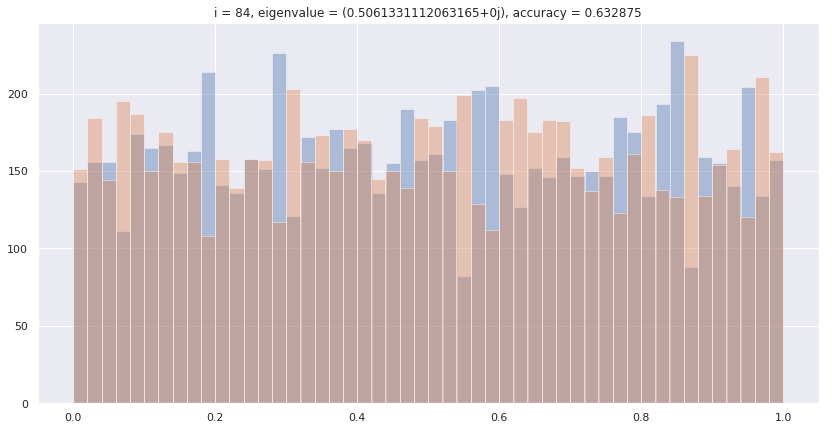

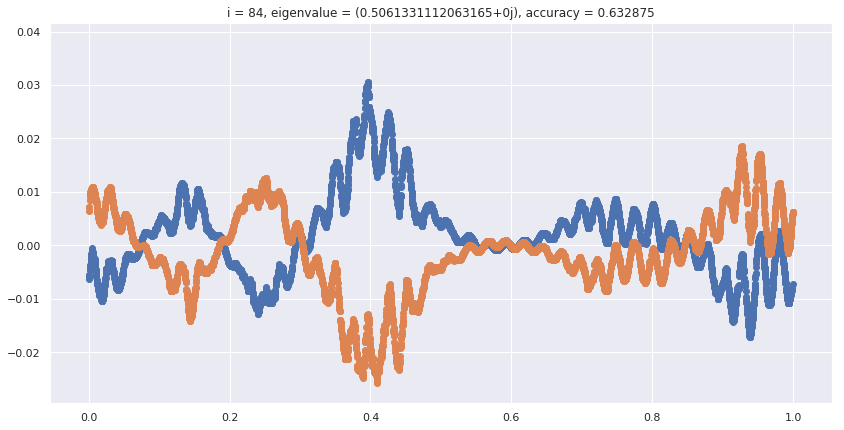

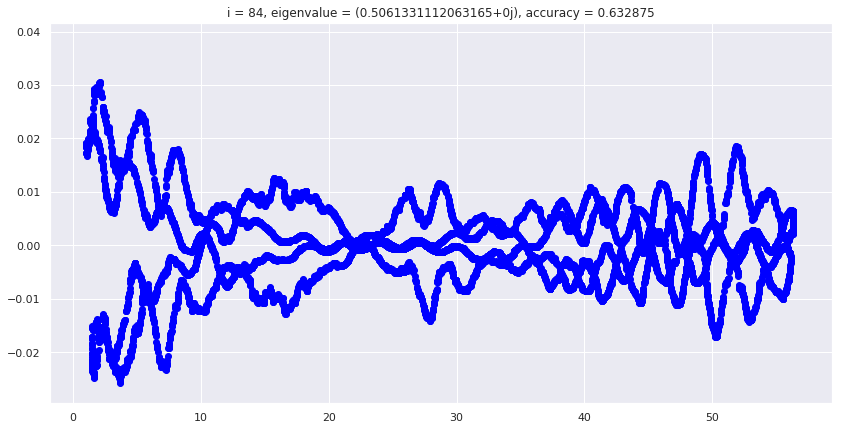

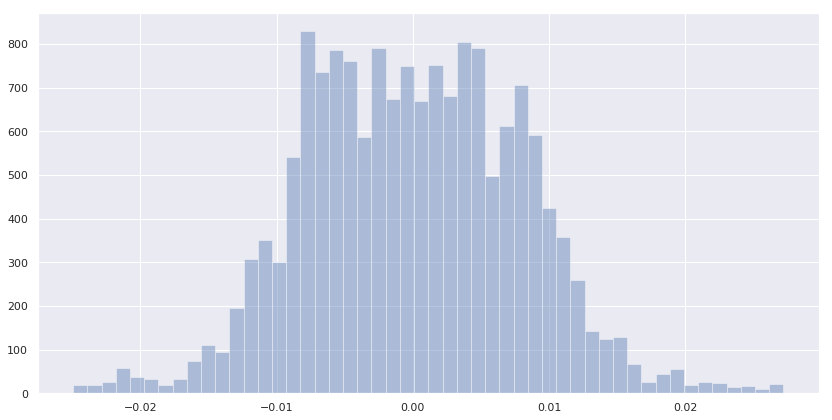

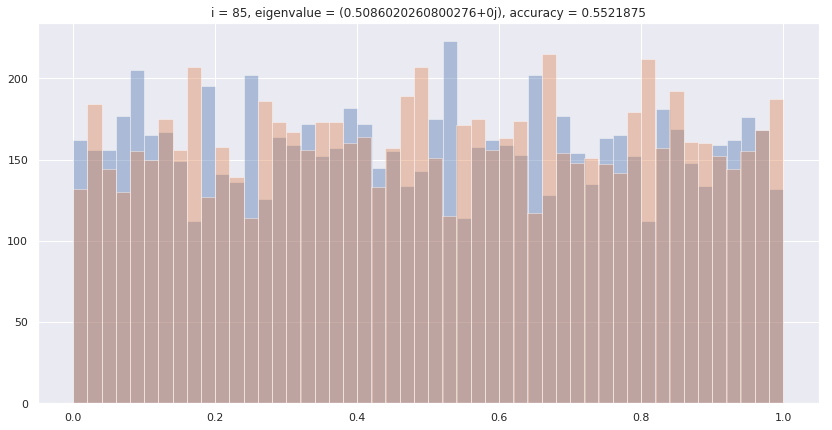

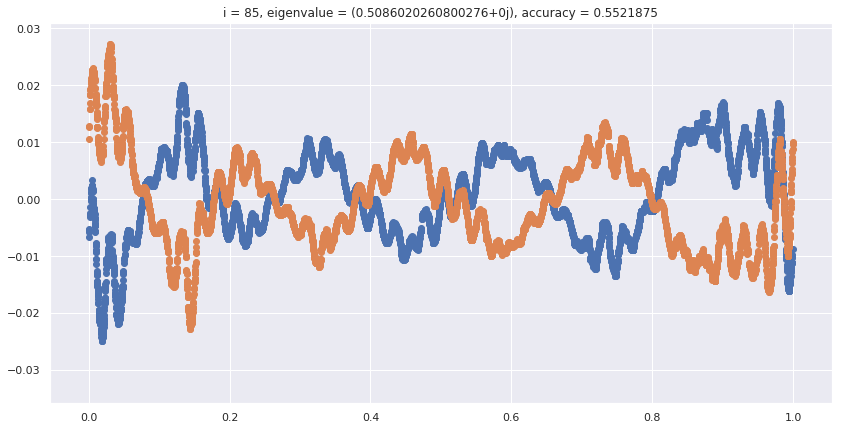

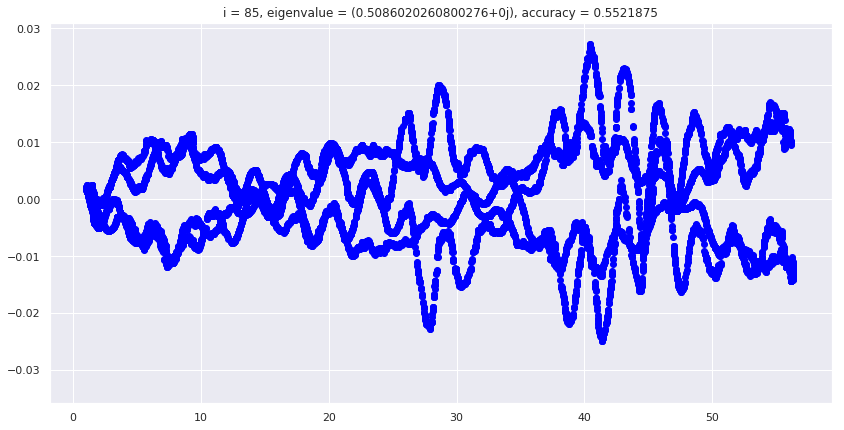

In [45]:
k_means_analysis(G, vectors = range(75, 86), cut_disp = True)

In [10]:
labeled_set = [u for u in G if G.nodes[u]['coordinate'] > 0.5 and G.nodes[u]['coordinate'] < 0.52]

In [11]:
l = Laplacian_regularization(G, [i for i in range(40, 60)], labeled_set = labeled_set, eta = 0.02)

IndexError: index 40 is out of bounds for axis 1 with size 40

In [7]:
G = GBM_graph(n_1 = 4000, n_2 = 4000, a = 15, b = 5)

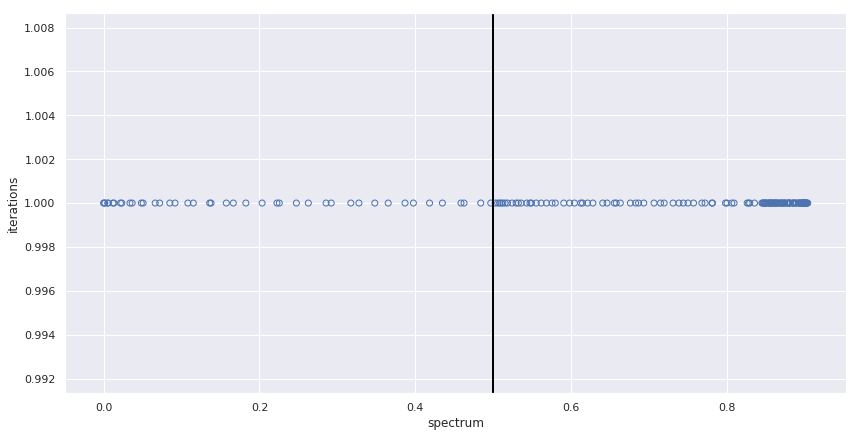

In [8]:
k_means_analysis(G, spectrum_disp=True)

In [38]:
G_rgg = GBM_graph(n_1 = 4000, n_2 = 4000, a = 15, b = 15)

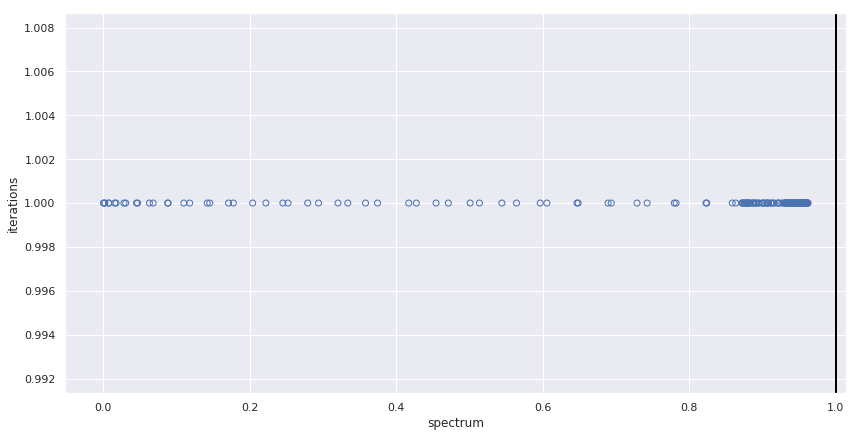

In [39]:
k_means_analysis(G_rgg, spectrum_disp=True)

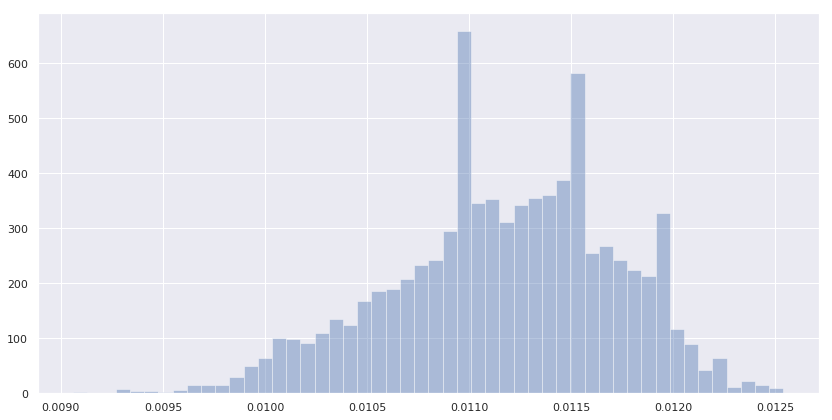

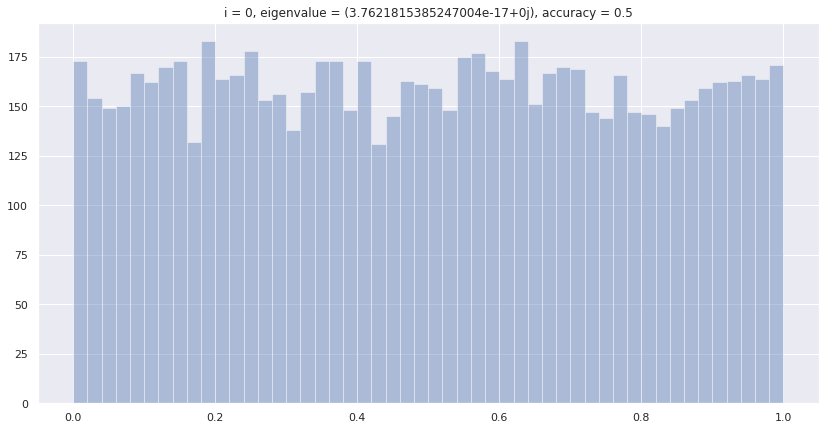

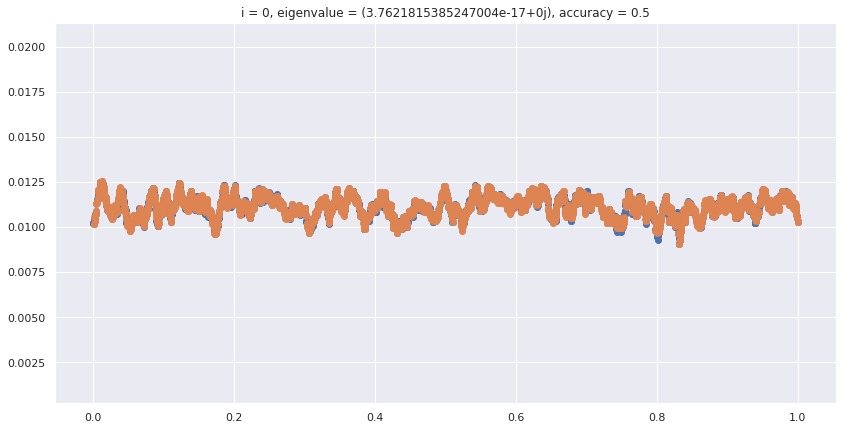

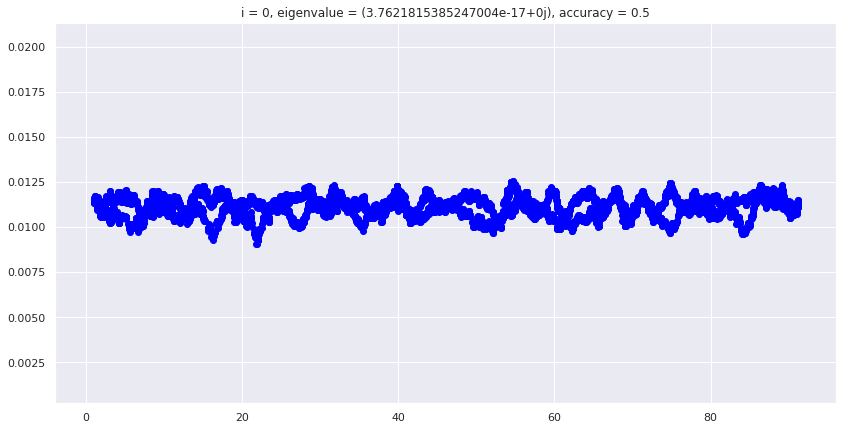

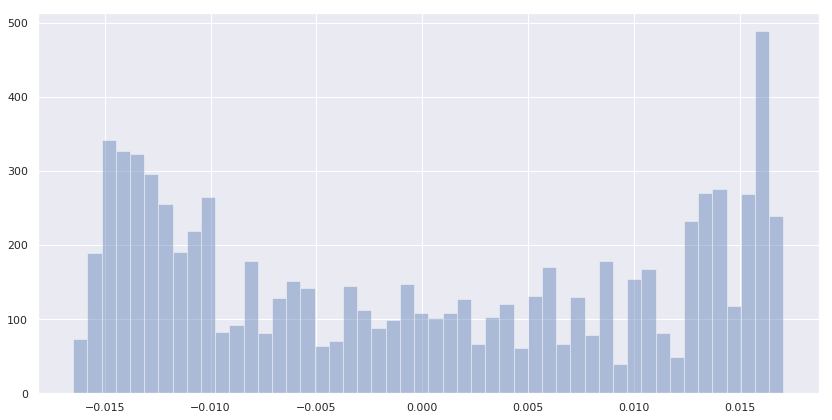

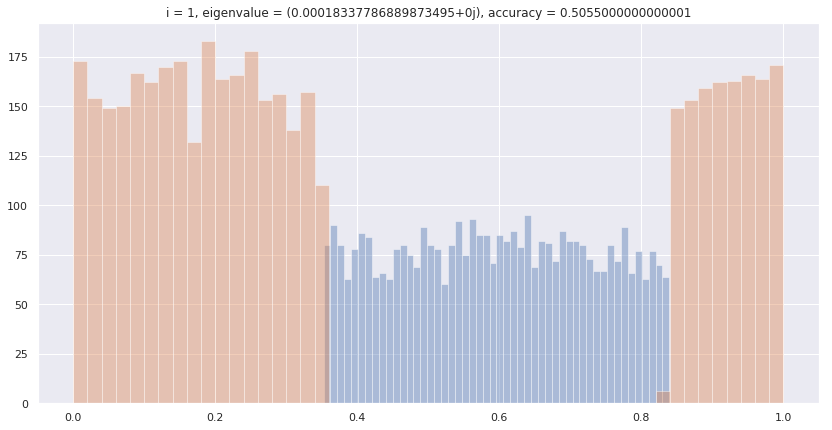

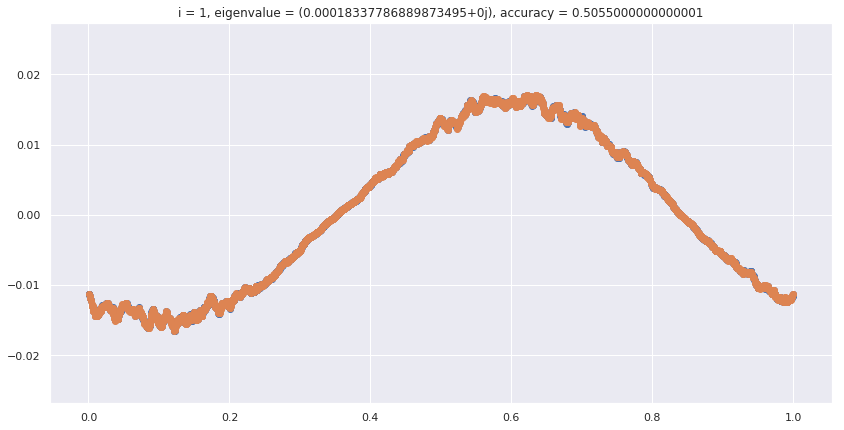

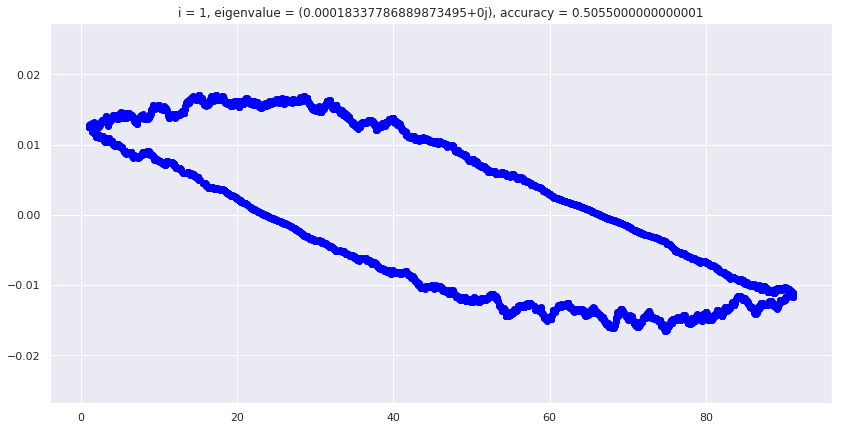

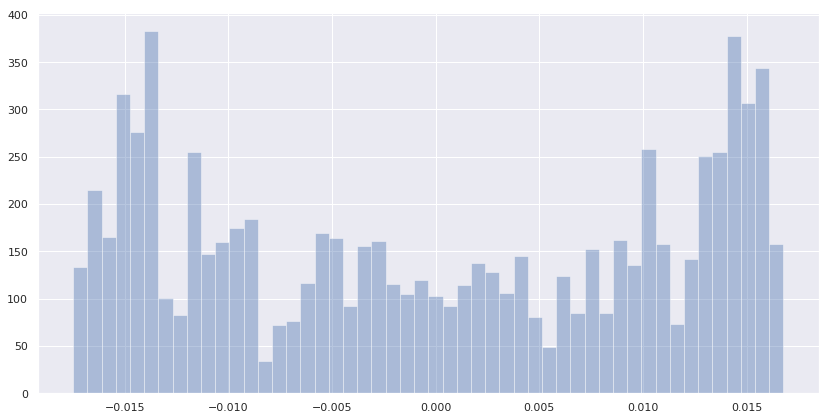

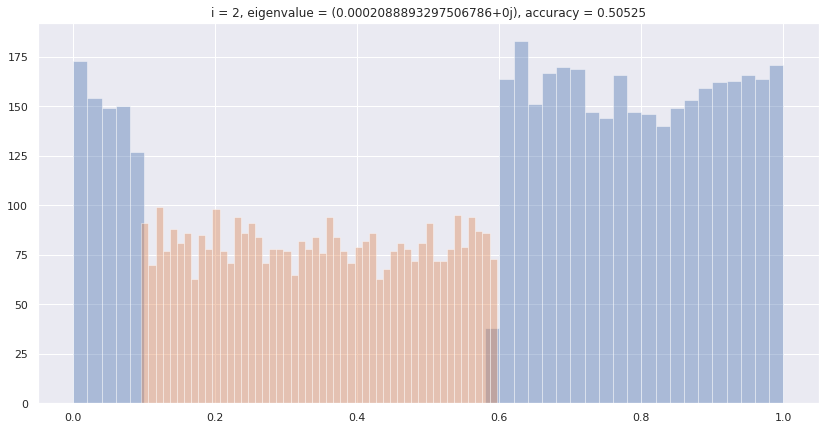

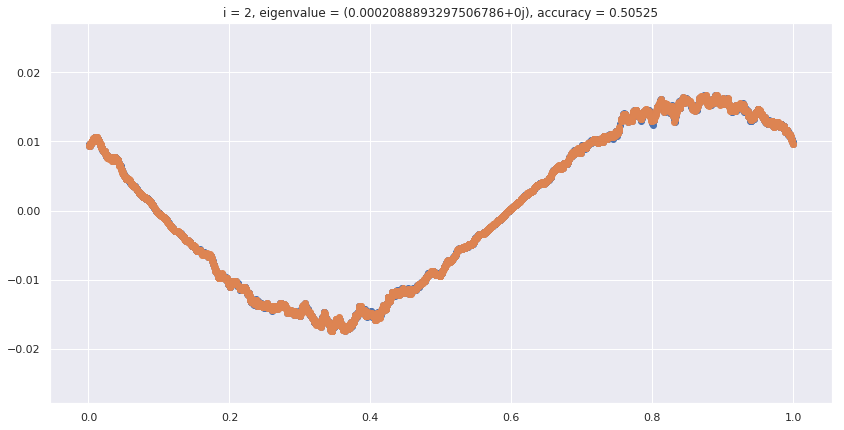

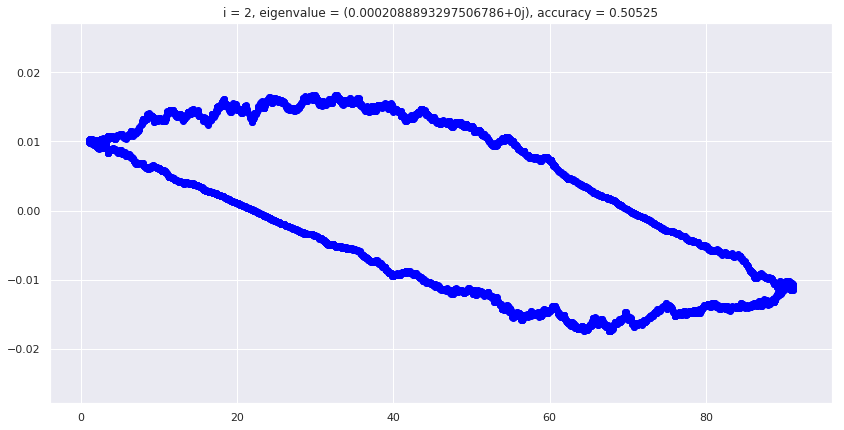

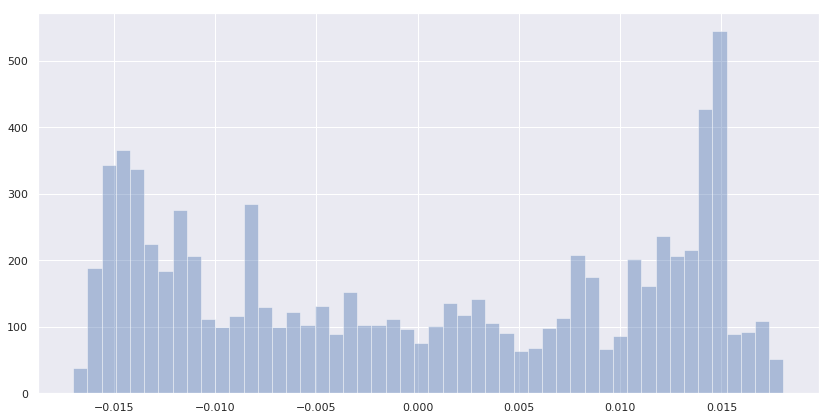

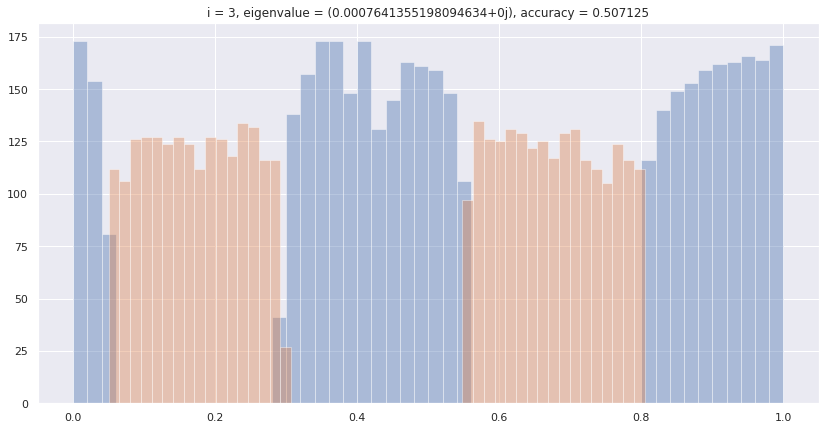

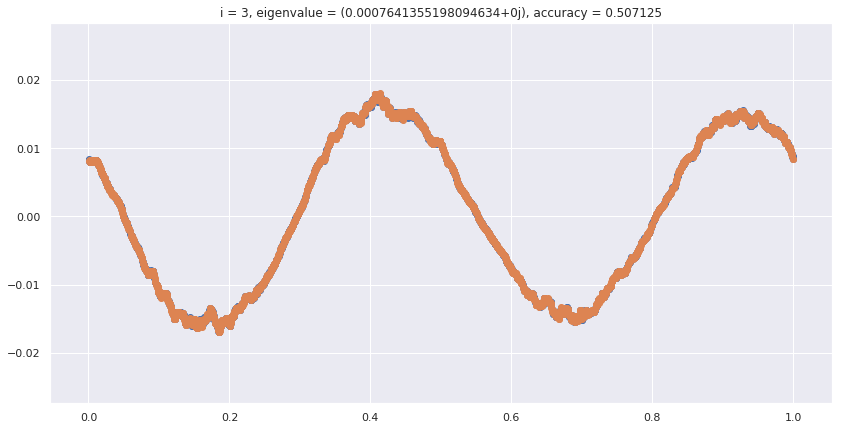

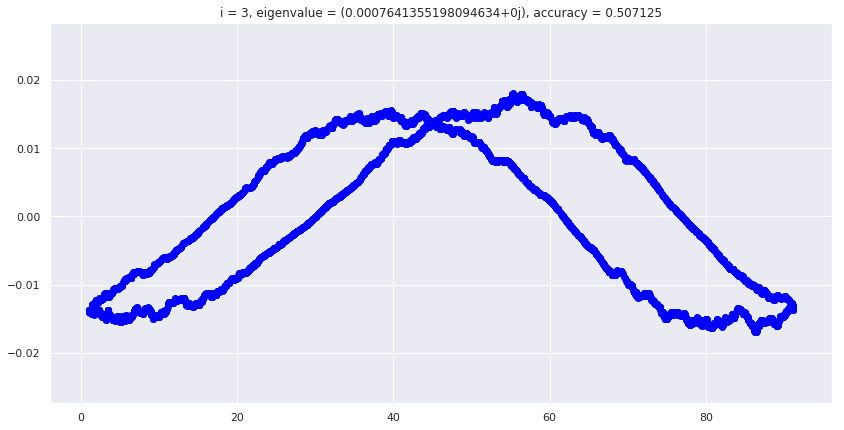

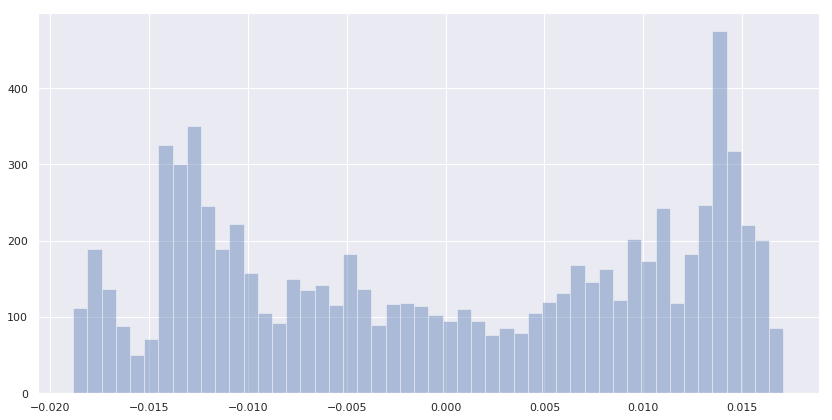

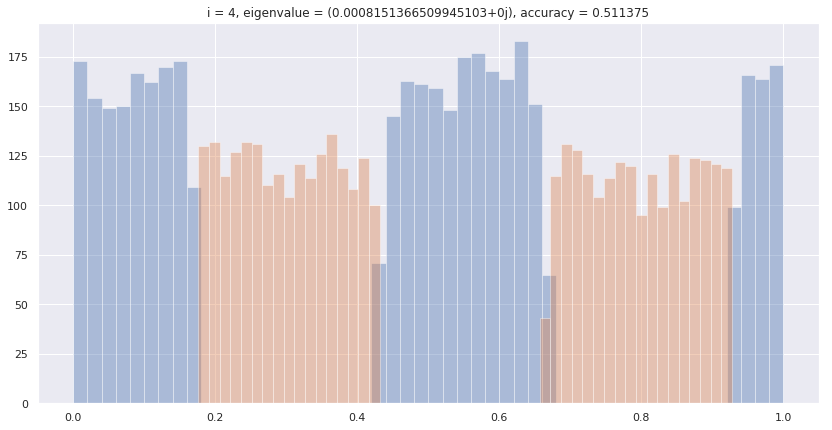

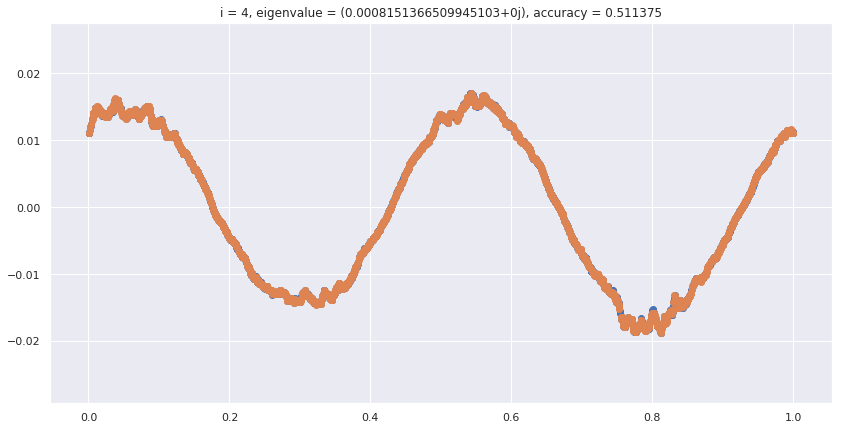

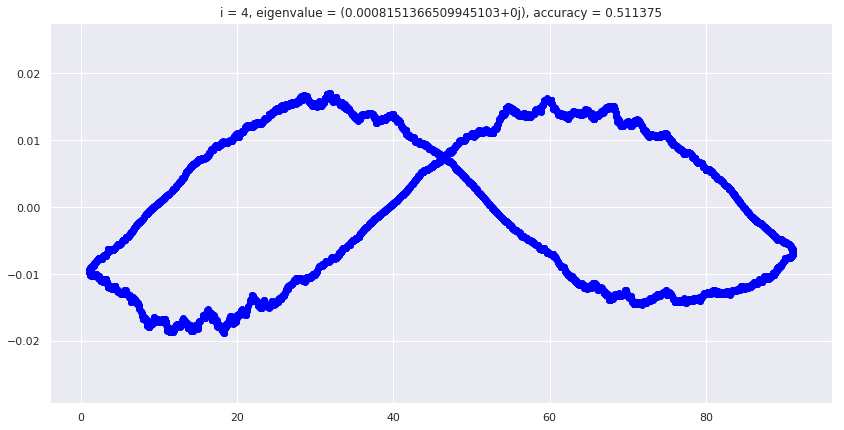

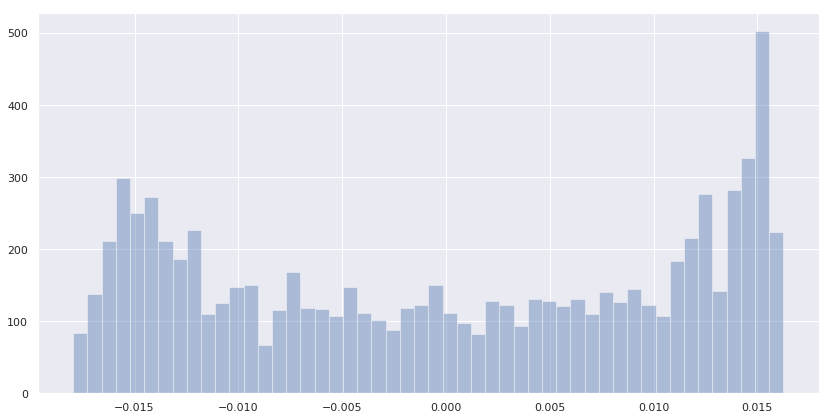

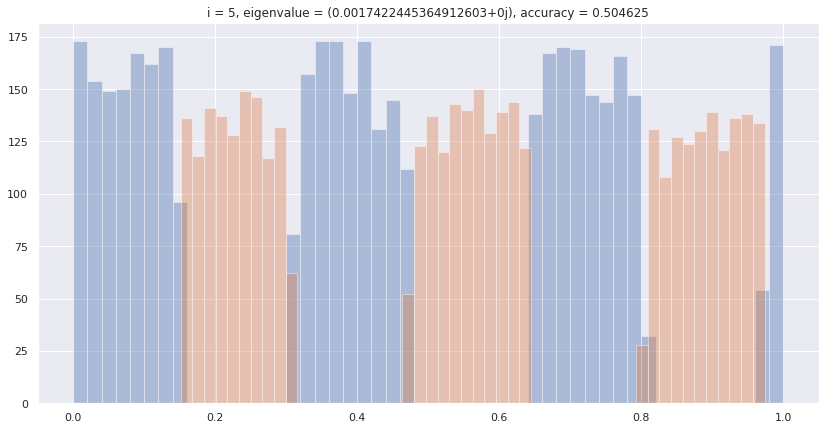

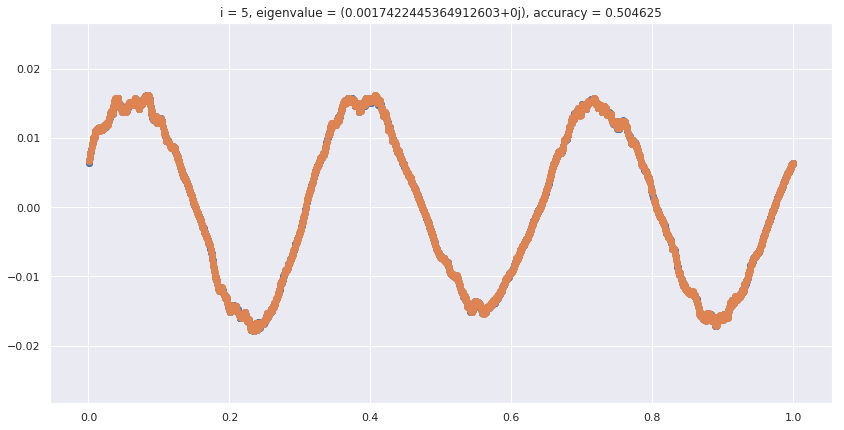

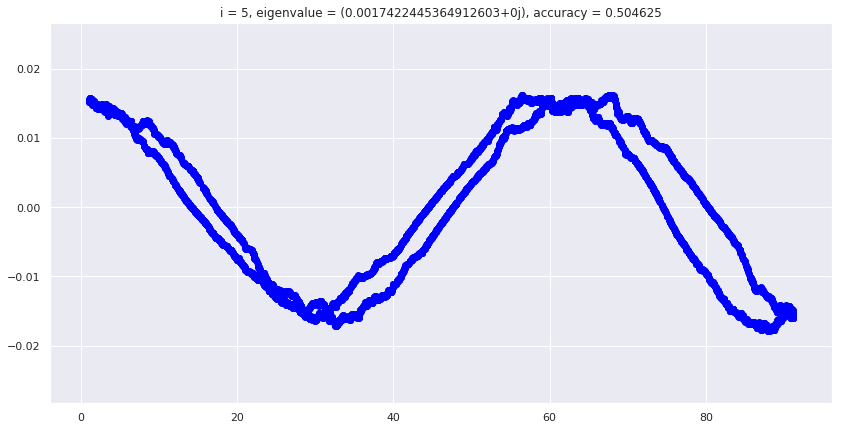

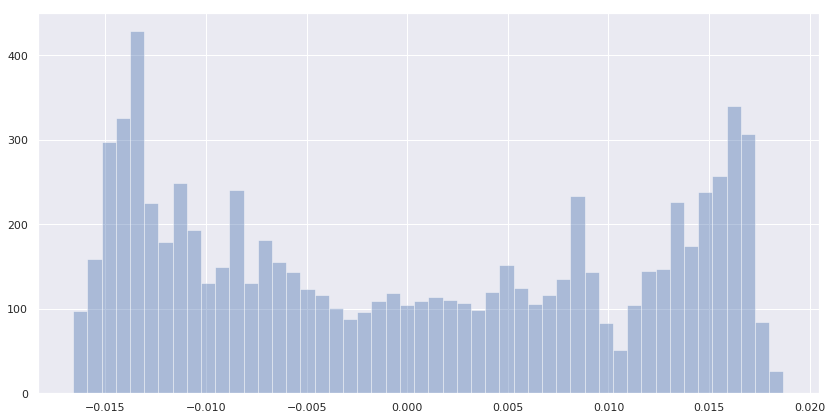

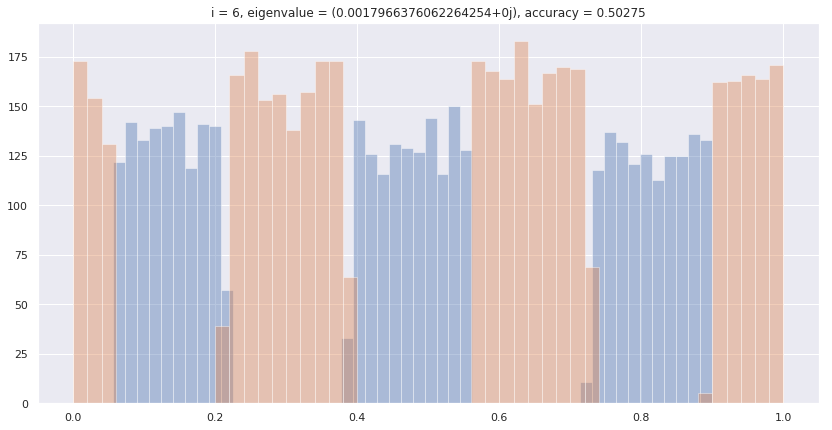

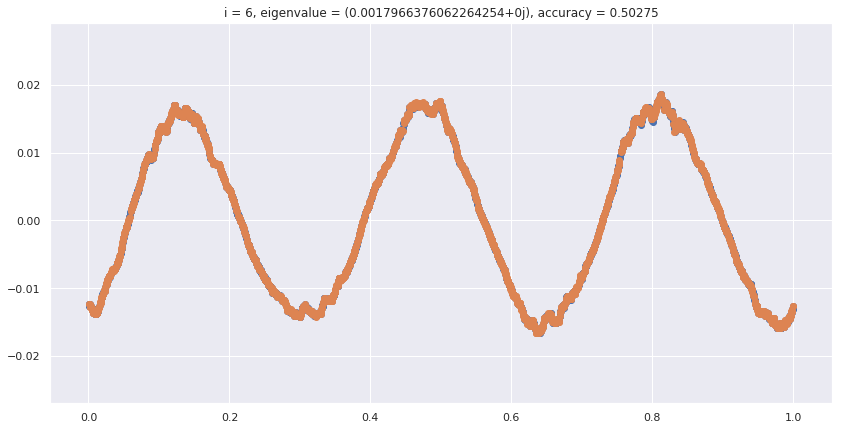

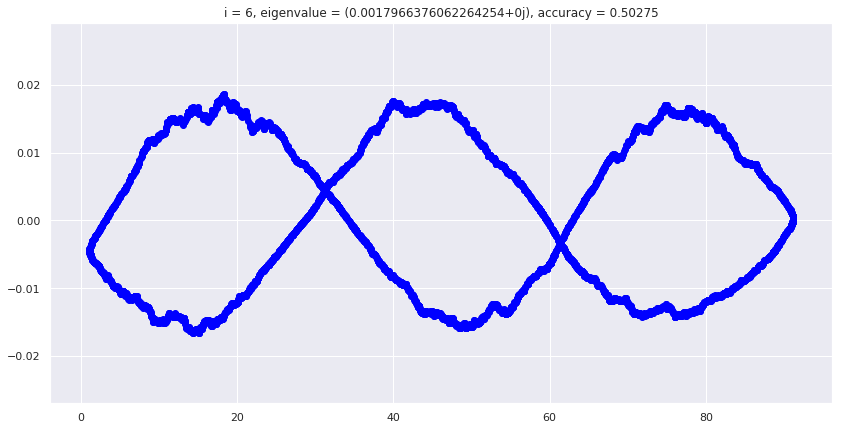

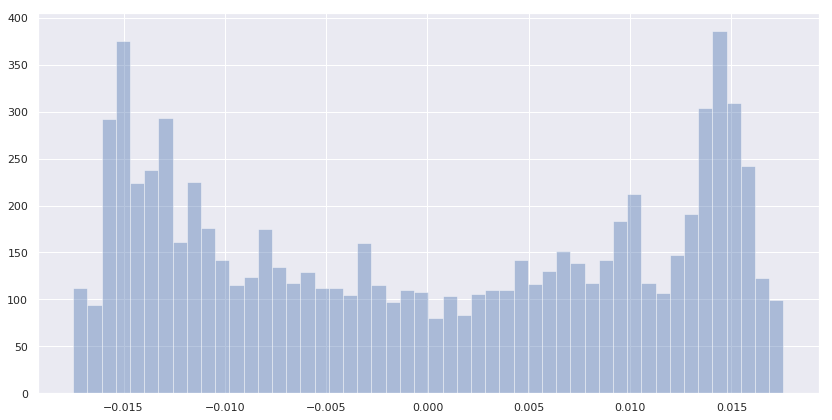

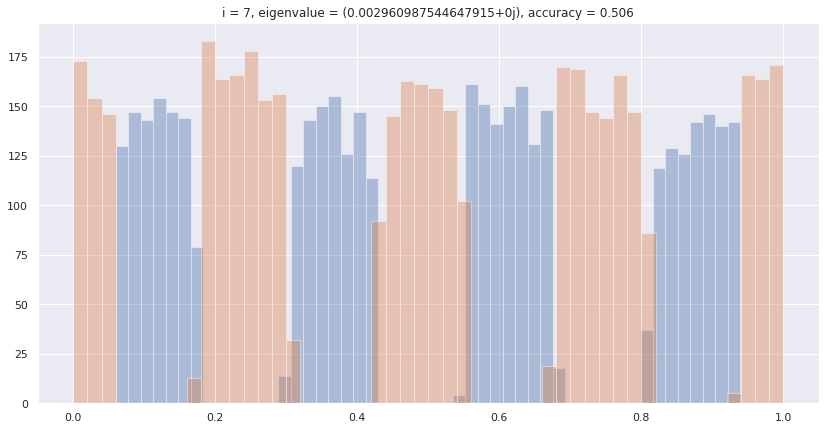

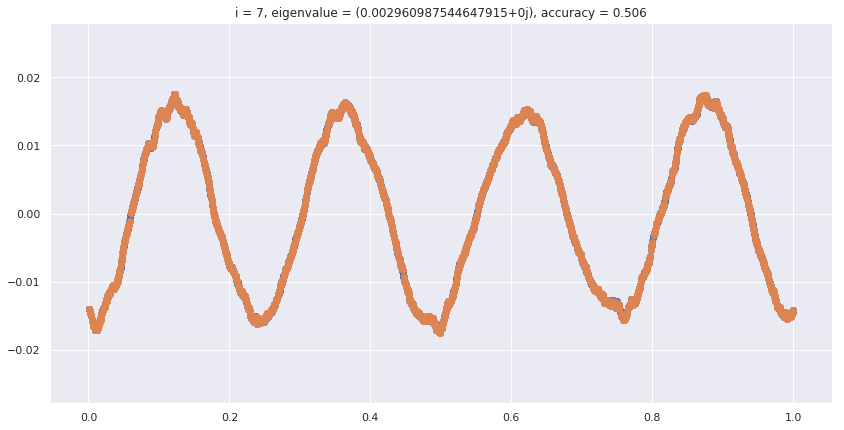

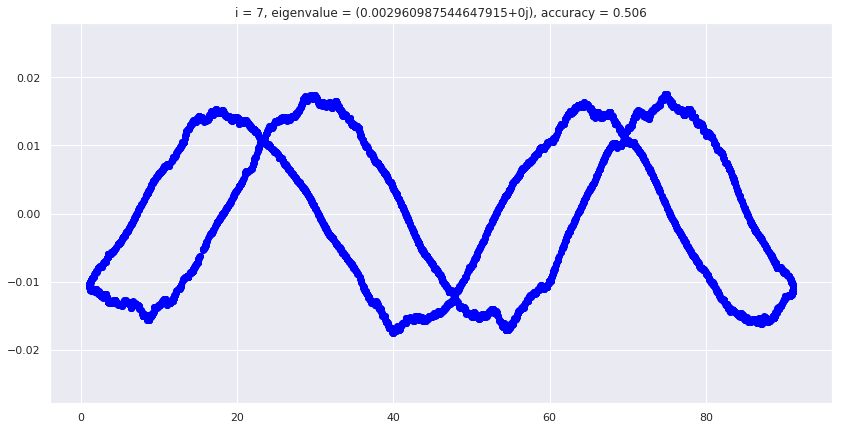

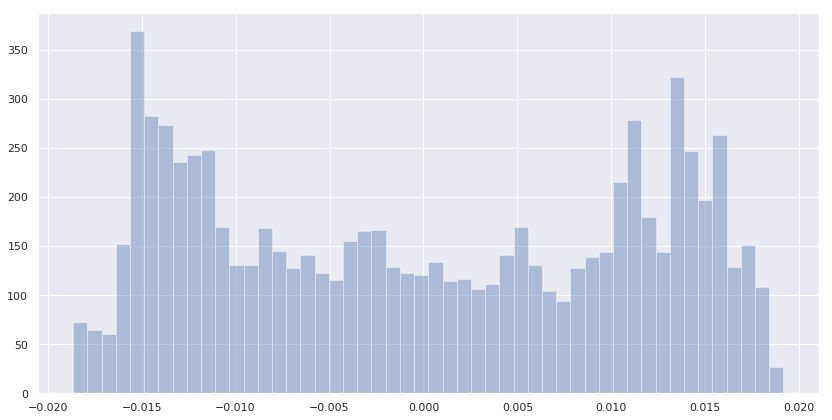

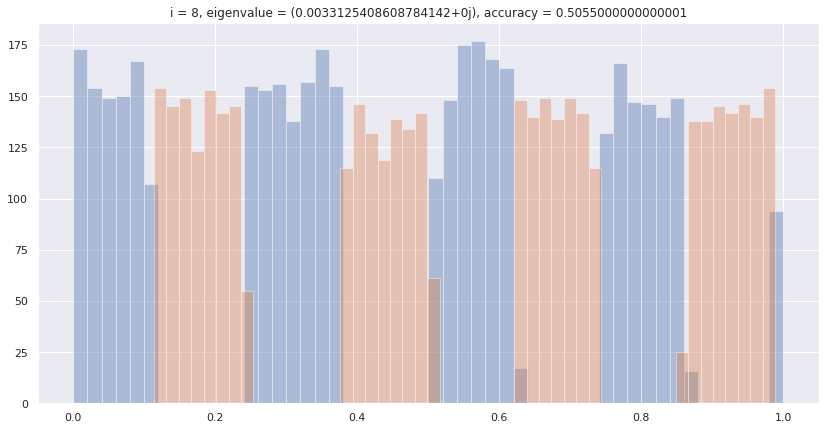

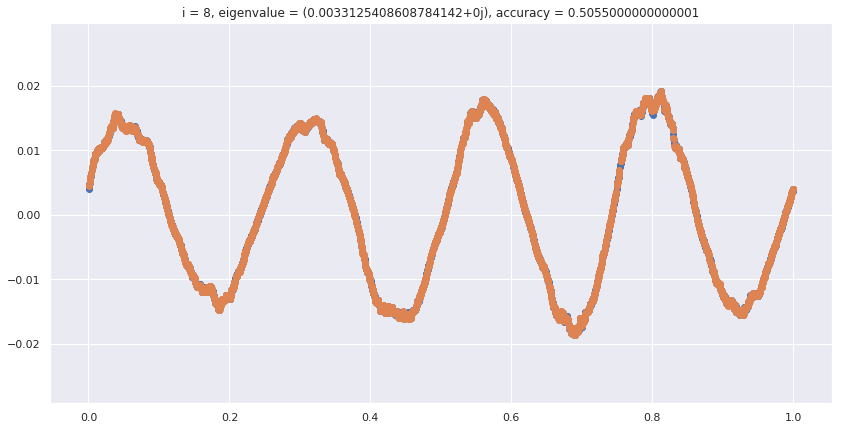

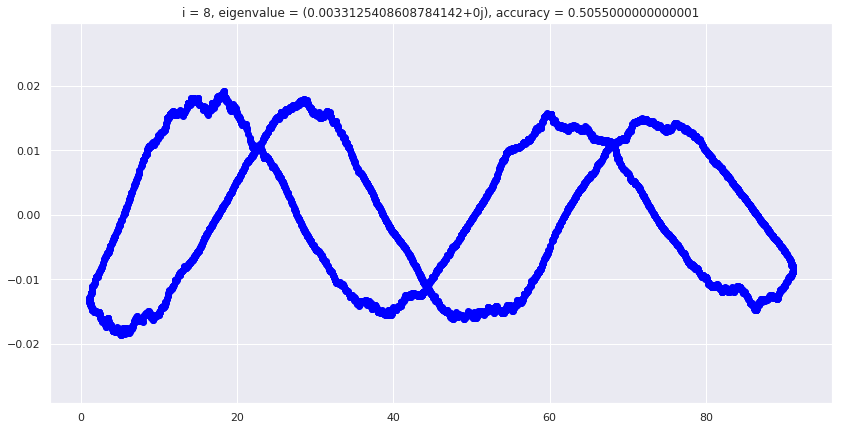

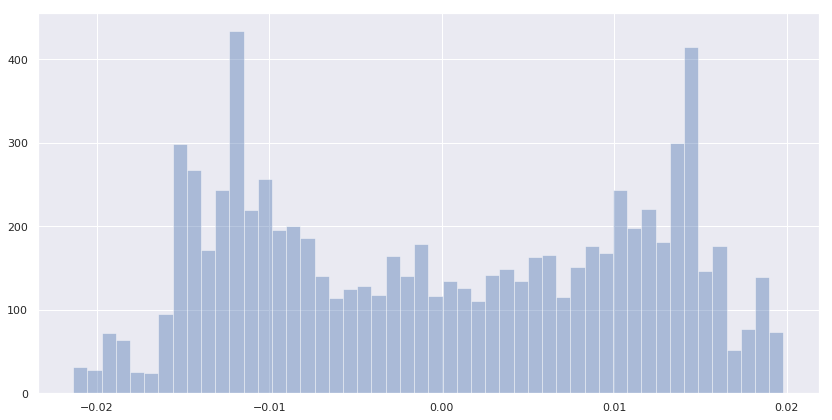

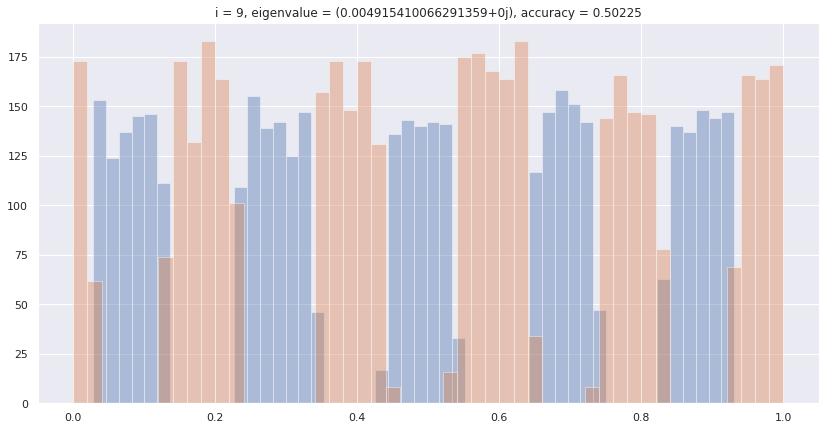

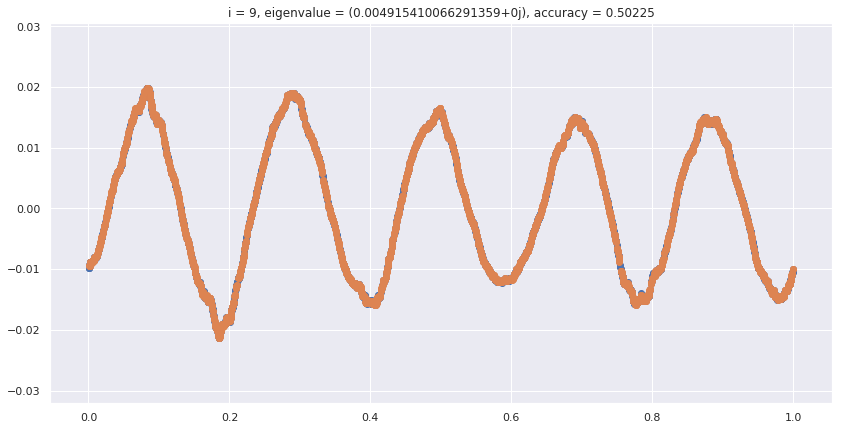

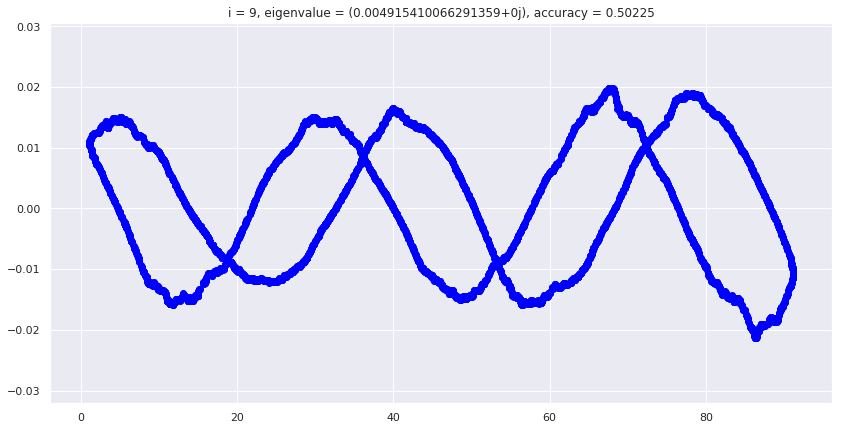

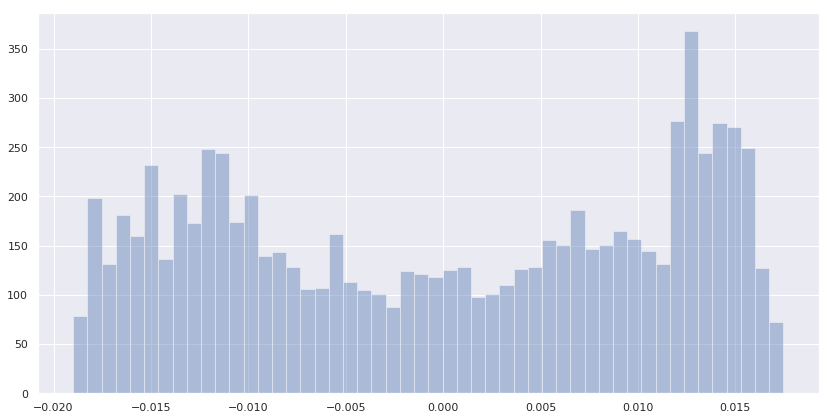

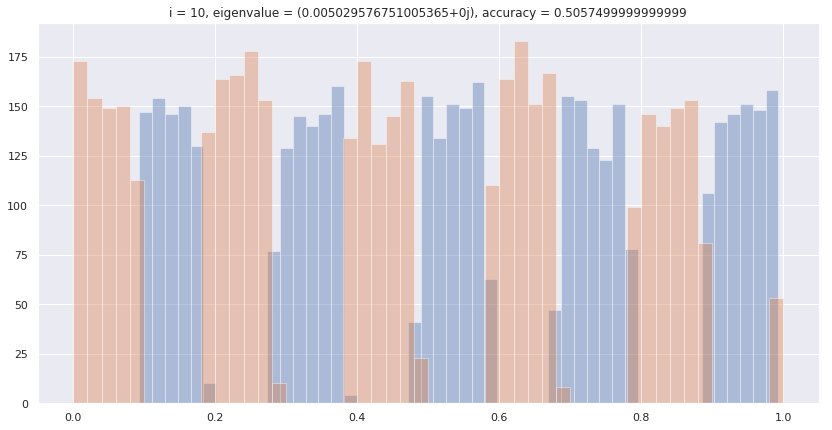

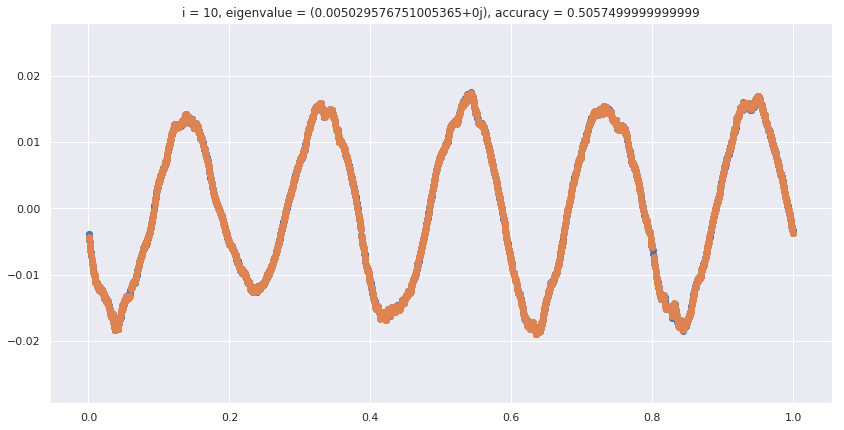

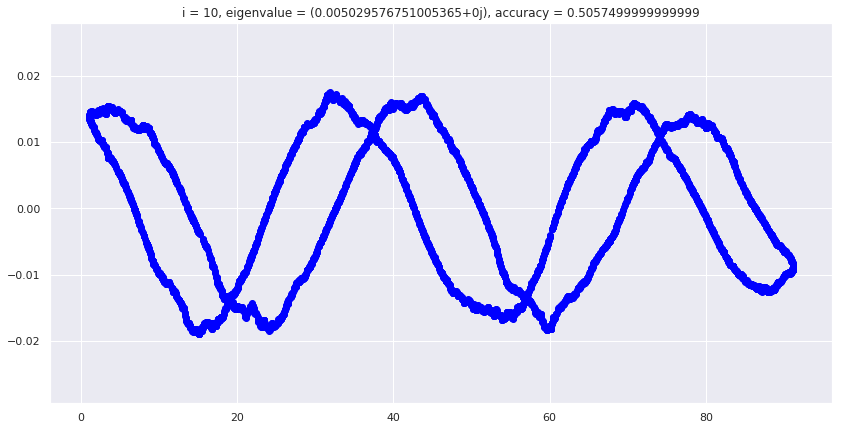

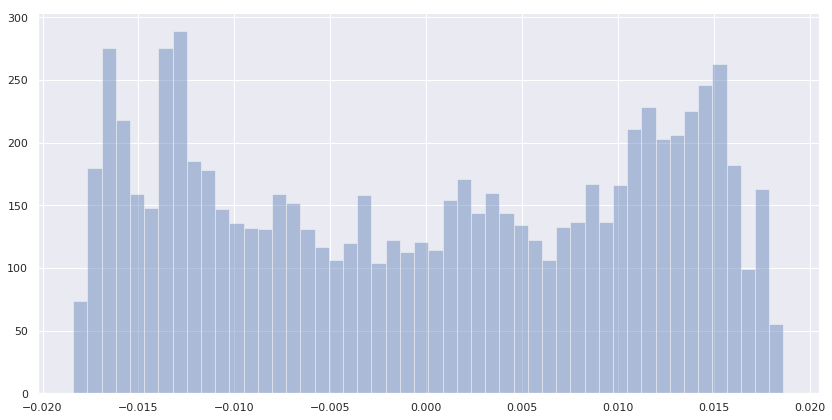

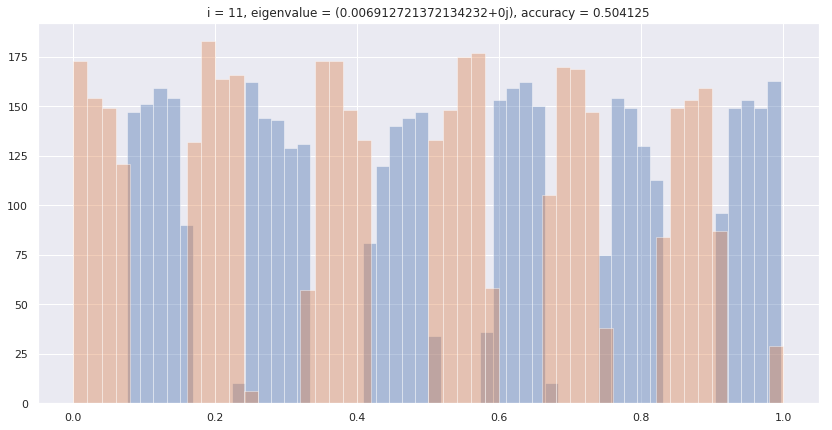

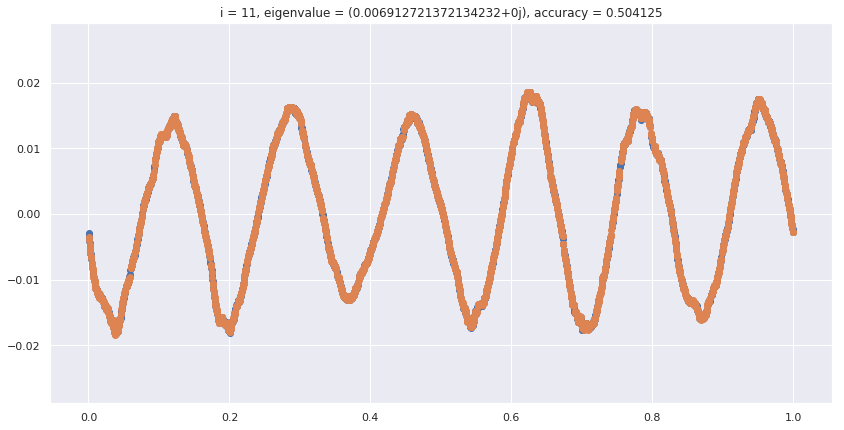

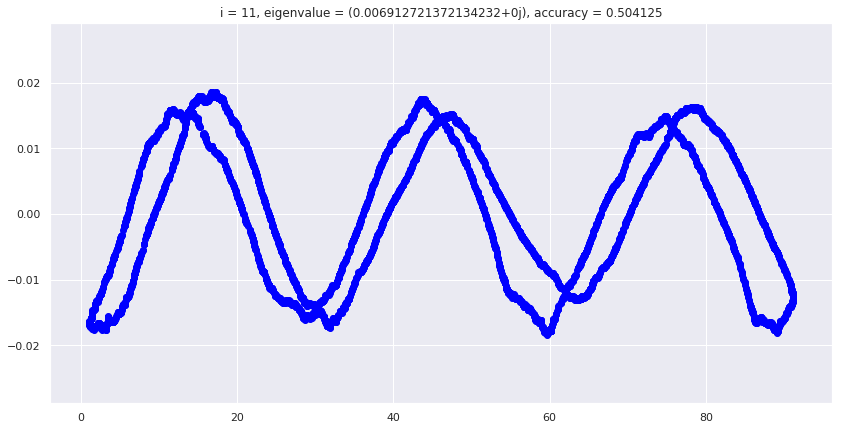

In [33]:
k_means_analysis(G_rgg, vectors = range(0,12), cut_disp=True)

In [25]:
G_rgg1 = GBM_graph(n_1 = 4000, n_2 = 4000, a = 10, b = 5)

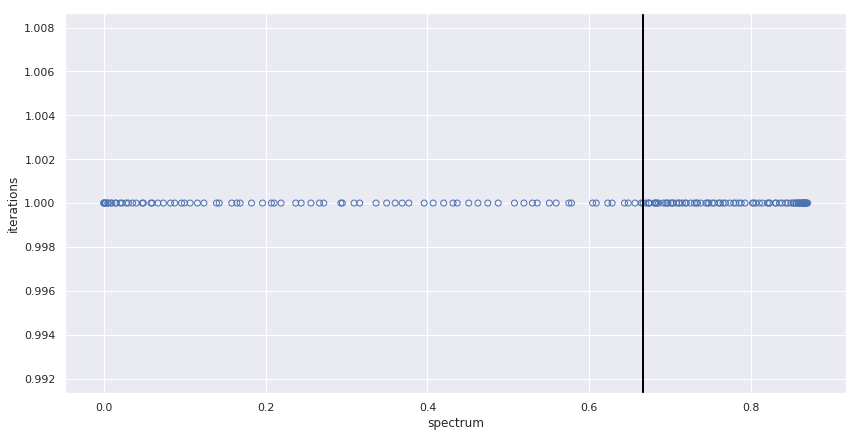

In [26]:
k_means_analysis(G_rgg1, spectrum_disp=True)

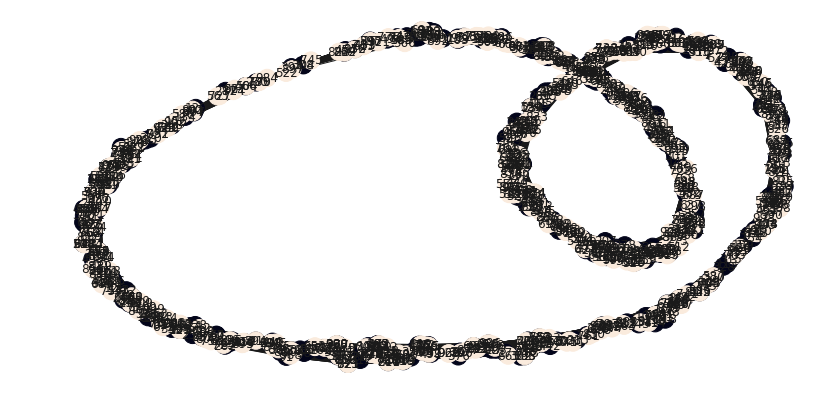

In [12]:
G_rgg1.plot()

In [13]:
G1 = GBM_graph(n_1 = 500, n_2 = 500, a = 15, b = 5)

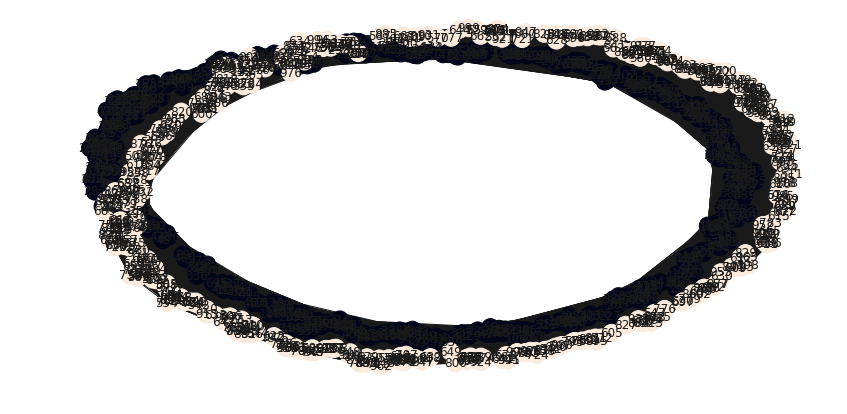

In [14]:
G1.plot()